In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as st
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1 Preprocessing

In [3]:
data=pd.read_csv("drug_consumption.csv")

In [4]:
#remove semer used categories,ethnicity remove,merge age categories,countries

In [5]:
df = data.copy()

In [6]:
df = df.drop(columns=['ID'])

In [7]:
data = data.drop(columns=['ID'])

In [8]:
data.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [9]:
age_col = {
          -0.95197: '18 - 24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }
df['Age'] = df['Age'].replace(age_col)
gender_col = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }
df['Gender'] = df['Gender'].replace(gender_col)
education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }
df['Education'] = df['Education'].replace(education_col)
country_col = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }
df['Country'] = df['Country'].replace(country_col)
ethnicity_col = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity_col)

In [10]:
# usage_col = {
#     'CL0': 'Never Used',
#     'CL1': 'Used over a Decade Ago',
#     'CL2': 'Used in Last Decade',
#     'CL3': 'Used in Last Year',
#     'CL4': 'Used in Last Month',
#     'CL5': 'Used in Last Week',
#     'CL6': 'Used in Last Day',
#     }
# df['Alcohol'] = df['Alcohol'].replace(usage_col)
# df['Amphet'] = df['Amphet'].replace(usage_col)
# df['Amyl'] = df['Amyl'].replace(usage_col)
# df['Benzos'] = df['Benzos'].replace(usage_col)
# df['Caff'] = df['Caff'].replace(usage_col)
# df['Cannabis'] = df['Cannabis'].replace(usage_col)
# df['Choc'] = df['Choc'].replace(usage_col)
# df['Coke'] = df['Coke'].replace(usage_col)
# df['Crack'] = df['Crack'].replace(usage_col)
# df['Ecstasy'] = df['Ecstasy'].replace(usage_col)
# df['Heroin'] = df['Heroin'].replace(usage_col)
# df['Ketamine'] = df['Ketamine'].replace(usage_col)
# df['Legalh'] = df['Legalh'].replace(usage_col)
# df['LSD'] = df['LSD'].replace(usage_col)
# df['Meth'] = df['Meth'].replace(usage_col)
# df['Mushrooms'] = df['Mushrooms'].replace(usage_col)
# df['Nicotine'] = df['Nicotine'].replace(usage_col)
# df['Semer'] = df['Semer'].replace(usage_col)
# df['VSA'] = df['VSA'].replace(usage_col)

In [11]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18 - 24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [12]:
len(data)

1885

In [13]:
df = df[df['Semer'] == "CL0"]

In [14]:
data= data[data['Semer'] == "CL0"]

In [15]:
len(data)

1877

In [16]:
df = df.drop(columns=["Ethnicity", "Semer"])

In [17]:
data= data.drop(columns=["Ethnicity", "Semer"])

In [18]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Nscore', 'Escore', 'Oscore',
       'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl',
       'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'VSA'],
      dtype='object')

In [19]:
df.loc[(df['Age'] == '55 - 64') | (df['Age'] == '65+'), 'Age'] = '55+'

In [20]:
data.loc[(data['Age'] == '55 - 64') | (data['Age'] == '65+'), 'Age'] = '55+'

In [21]:
df.loc[(df['Country']=='Australia')|(df['Country']=='Canada')|(df['Country']=='New Zealand')|(df['Country']=='Other')|(df['Country']=='Republic of Ireland'),'Country']='Other_countries'

In [22]:
data.loc[(data['Country']=='Australia')|(data['Country']=='Canada')|(data['Country']=='New Zealand')|(data['Country']=='Other')|(data['Country']=='Republic of Ireland'),'Country']='Other_countries'

In [23]:
psych_cols=['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
drug_cols=['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc','Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

In [24]:
breaks = [-np.inf, -1, 0, 1, np.inf]
labels = ["Very Low", "Low", "High", "Very High"]

In [25]:
for col in psych_cols:
    df[f'{col}_category'] = pd.cut(df[col], bins=breaks, labels=labels, right=False)
print(df.head())

       Age  Gender                          Education Country   Nscore  \
0  35 - 44  Female  Professional Certificate/ Diploma      UK  0.31287   
1  25 - 34    Male                   Doctorate Degree      UK -0.67825   
2  35 - 44    Male  Professional Certificate/ Diploma      UK -0.46725   
3  18 - 24  Female                     Masters Degree      UK -0.14882   
4  35 - 44  Female                   Doctorate Degree      UK  0.73545   

    Escore   Oscore   Ascore   Cscore  Impulsive  ...  Mushrooms Nicotine  \
0 -0.57545 -0.58331 -0.91699 -0.00665   -0.21712  ...        CL0      CL2   
1  1.93886  1.43533  0.76096 -0.14277   -0.71126  ...        CL0      CL4   
2  0.80523 -0.84732 -1.62090 -1.01450   -1.37983  ...        CL1      CL0   
3 -0.80615 -0.01928  0.59042  0.58489   -1.37983  ...        CL0      CL2   
4 -1.63340 -0.45174 -0.30172  1.30612   -0.21712  ...        CL2      CL2   

   VSA Nscore_category Escore_category Oscore_category Ascore_category  \
0  CL0            

In [26]:
df=df.drop(columns=psych_cols)

In [27]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Alcohol', 'Amphet', 'Amyl',
       'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'VSA', 'Nscore_category', 'Escore_category', 'Oscore_category',
       'Ascore_category', 'Cscore_category', 'Impulsive_category',
       'SS_category'],
      dtype='object')

In [28]:
categorical_columns=['Age', 'Gender', 'Education', 'Country','Nscore_category','Escore_category', 'Oscore_category','Ascore_category', 'Cscore_category', 'Impulsive_category','SS_category']

In [29]:
# def ChiSquareContingency(feature, target):
#     contingency_table = pd.crosstab(feature, target)
#     chi2, p_value, _, _ = chi2_contingency(contingency_table)
#     print(f'p-value: {p_value}')
#     if p_value > 0.05:
#         print(f'Accept H0, feature {feature.name} is independent with {target.name}')
#     else:
#         print(f'Reject H0, feature {feature.name} is dependent with {target.name}')

# for column in categorical_columns:
#     for drug in drug_cols:
#         print(f'Chi-Square Test for {column} and {drug}:')
#         ChiSquareContingency(x_train[column], y_train[drug])
#         print('')

In [30]:
# def find_rare_categories(data, threshold=0.01):
#     rare_categories = {}
#     for col in categorical_columns:
#         category_counts = data[col].value_counts(normalize=True)
#         rare = category_counts[category_counts < threshold].index.tolist()
#         rare_categories[col] = rare
#     return rare_categories

# rare_categories = find_rare_categories(df, threshold=0.01)
# print(rare_categories)

# 2 Modelling

In [31]:
data_new=df

In [32]:
for column in drug_cols:
    data_new[column] = data_new[column].replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0, 1, 2, 3, 4, 5, 6])


In [33]:
data_new

,Age,Gender,Education,Country,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,...,Mushrooms,Nicotine,VSA,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category
0,35 - 44,Female,Professional Certificate/ Diploma,UK,5,2,0,2,6,0,...,0,2,0,High,Low,Low,Low,Low,Low,Very Low
1,25 - 34,Male,Doctorate Degree,UK,5,2,2,0,6,4,...,0,4,0,Low,Very High,Very High,High,Low,Low,Low
2,35 - 44,Male,Professional Certificate/ Diploma,UK,6,0,0,0,6,3,...,1,0,0,Low,High,Low,Very Low,Very Low,Very Low,High
3,18 - 24,Female,Masters Degree,UK,4,0,0,3,5,2,...,0,2,0,Low,Low,Low,High,High,Very Low,Very Low
4,35 - 44,Female,Doctorate Degree,UK,4,1,1,0,6,3,...,2,2,0,High,Very Low,Low,Low,Very High,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18 - 24,Female,"Some College,No Certificate Or Degree",USA,5,0,0,0,4,5,...,0,0,5,Very Low,Very High,Very High,High,Very Low,High,Very High
1881,18 - 24,Male,"Some College,No Certificate Or Degree",USA,5,0,0,0,5,3,...,4,5,0,Low,Very High,High,High,Very Low,High,High
1882,25 - 34,Female,University Degree,USA,4,6,5,5,6,6,...,2,6,0,Very High,Very Low,Very Low,Very Low,Very Low,High,Low
1883,18 - 24,Female,"Some College,No Certificate Or Degree",USA,5,0,0,0,6,6,...,3,4,0,High,Very Low,High,Very Low,Very Low,Very High,Very High


In [34]:
stimulants = ["Choc","Caff","Amphet", "Coke", "Crack", "Meth", "Nicotine"]
depressants = ["Alcohol", "Benzos", "Heroin", "Legalh", "Amyl", "VSA"]
hallucinogens = ["LSD", "Mushrooms", "Ketamine", "Cannabis", "Ecstasy"]

In [35]:
def categorize_usage(level):
    if level >= 3:
        return 1
    else:
        return 0

In [36]:
for drug in stimulants:
    data_new[drug] = data_new[drug].apply(categorize_usage)

In [37]:
for drug in depressants:
    data_new[drug] = data_new[drug].apply(categorize_usage)

In [38]:
for drug in hallucinogens:
    data_new[drug] = data_new[drug].apply(categorize_usage)

In [39]:
data_new

,Age,Gender,Education,Country,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,...,Mushrooms,Nicotine,VSA,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category
0,35 - 44,Female,Professional Certificate/ Diploma,UK,1,0,0,0,1,0,...,0,0,0,High,Low,Low,Low,Low,Low,Very Low
1,25 - 34,Male,Doctorate Degree,UK,1,0,0,0,1,1,...,0,1,0,Low,Very High,Very High,High,Low,Low,Low
2,35 - 44,Male,Professional Certificate/ Diploma,UK,1,0,0,0,1,1,...,0,0,0,Low,High,Low,Very Low,Very Low,Very Low,High
3,18 - 24,Female,Masters Degree,UK,1,0,0,1,1,0,...,0,0,0,Low,Low,Low,High,High,Very Low,Very Low
4,35 - 44,Female,Doctorate Degree,UK,1,0,0,0,1,1,...,0,0,0,High,Very Low,Low,Low,Very High,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18 - 24,Female,"Some College,No Certificate Or Degree",USA,1,0,0,0,1,1,...,0,0,1,Very Low,Very High,Very High,High,Very Low,High,Very High
1881,18 - 24,Male,"Some College,No Certificate Or Degree",USA,1,0,0,0,1,1,...,1,1,0,Low,Very High,High,High,Very Low,High,High
1882,25 - 34,Female,University Degree,USA,1,1,1,1,1,1,...,0,1,0,Very High,Very Low,Very Low,Very Low,Very Low,High,Low
1883,18 - 24,Female,"Some College,No Certificate Or Degree",USA,1,0,0,0,1,1,...,1,1,0,High,Very Low,High,Very Low,Very Low,Very High,Very High


In [40]:
data_without_categories=data_new.copy()

In [41]:
data_without_categories

,Age,Gender,Education,Country,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,...,Mushrooms,Nicotine,VSA,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category
0,35 - 44,Female,Professional Certificate/ Diploma,UK,1,0,0,0,1,0,...,0,0,0,High,Low,Low,Low,Low,Low,Very Low
1,25 - 34,Male,Doctorate Degree,UK,1,0,0,0,1,1,...,0,1,0,Low,Very High,Very High,High,Low,Low,Low
2,35 - 44,Male,Professional Certificate/ Diploma,UK,1,0,0,0,1,1,...,0,0,0,Low,High,Low,Very Low,Very Low,Very Low,High
3,18 - 24,Female,Masters Degree,UK,1,0,0,1,1,0,...,0,0,0,Low,Low,Low,High,High,Very Low,Very Low
4,35 - 44,Female,Doctorate Degree,UK,1,0,0,0,1,1,...,0,0,0,High,Very Low,Low,Low,Very High,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18 - 24,Female,"Some College,No Certificate Or Degree",USA,1,0,0,0,1,1,...,0,0,1,Very Low,Very High,Very High,High,Very Low,High,Very High
1881,18 - 24,Male,"Some College,No Certificate Or Degree",USA,1,0,0,0,1,1,...,1,1,0,Low,Very High,High,High,Very Low,High,High
1882,25 - 34,Female,University Degree,USA,1,1,1,1,1,1,...,0,1,0,Very High,Very Low,Very Low,Very Low,Very Low,High,Low
1883,18 - 24,Female,"Some College,No Certificate Or Degree",USA,1,0,0,0,1,1,...,1,1,0,High,Very Low,High,Very Low,Very Low,Very High,Very High


In [42]:
data_new['Stimulants'] = data_new[stimulants].max(axis=1)
data_new['Depressants'] = data_new[depressants].max(axis=1)
data_new['Hallucinogens'] = data_new[hallucinogens].max(axis=1)

In [43]:
data_new=data_new.drop(columns=drug_cols)

In [44]:
data_new

,Age,Gender,Education,Country,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category,Stimulants,Depressants,Hallucinogens
0,35 - 44,Female,Professional Certificate/ Diploma,UK,High,Low,Low,Low,Low,Low,Very Low,1,1,0
1,25 - 34,Male,Doctorate Degree,UK,Low,Very High,Very High,High,Low,Low,Low,1,1,1
2,35 - 44,Male,Professional Certificate/ Diploma,UK,Low,High,Low,Very Low,Very Low,Very Low,High,1,1,1
3,18 - 24,Female,Masters Degree,UK,Low,Low,Low,High,High,Very Low,Very Low,1,1,0
4,35 - 44,Female,Doctorate Degree,UK,High,Very Low,Low,Low,Very High,Low,Low,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18 - 24,Female,"Some College,No Certificate Or Degree",USA,Very Low,Very High,Very High,High,Very Low,High,Very High,1,1,1
1881,18 - 24,Male,"Some College,No Certificate Or Degree",USA,Low,Very High,High,High,Very Low,High,High,1,1,1
1882,25 - 34,Female,University Degree,USA,Very High,Very Low,Very Low,Very Low,Very Low,High,Low,1,1,1
1883,18 - 24,Female,"Some College,No Certificate Or Degree",USA,High,Very Low,High,Very Low,Very Low,Very High,Very High,1,1,1


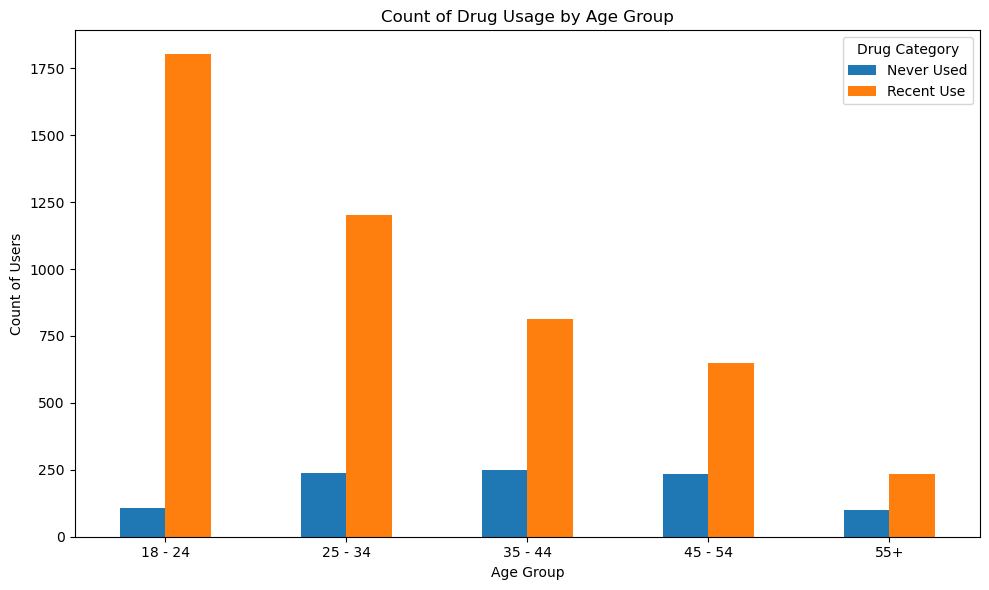

In [45]:
count_data = data_new.groupby(['Age', 'Stimulants'])['Stimulants'].count().unstack().fillna(0)
count_data = pd.concat([count_data, data_new.groupby(['Age', 'Depressants'])['Depressants'].count().unstack().fillna(0)]) # Use pd.concat to combine DataFrames
count_data = pd.concat([count_data, data_new.groupby(['Age', 'Hallucinogens'])['Hallucinogens'].count().unstack().fillna(0)]) # Use pd.concat to combine DataFrames
count_data = count_data.groupby('Age').sum()
import matplotlib.pyplot as plt
count_data.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Drug Usage by Age Group')
plt.ylabel('Count of Users')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Drug Category', labels=['Never Used', 'Recent Use'])
plt.tight_layout()
plt.show()

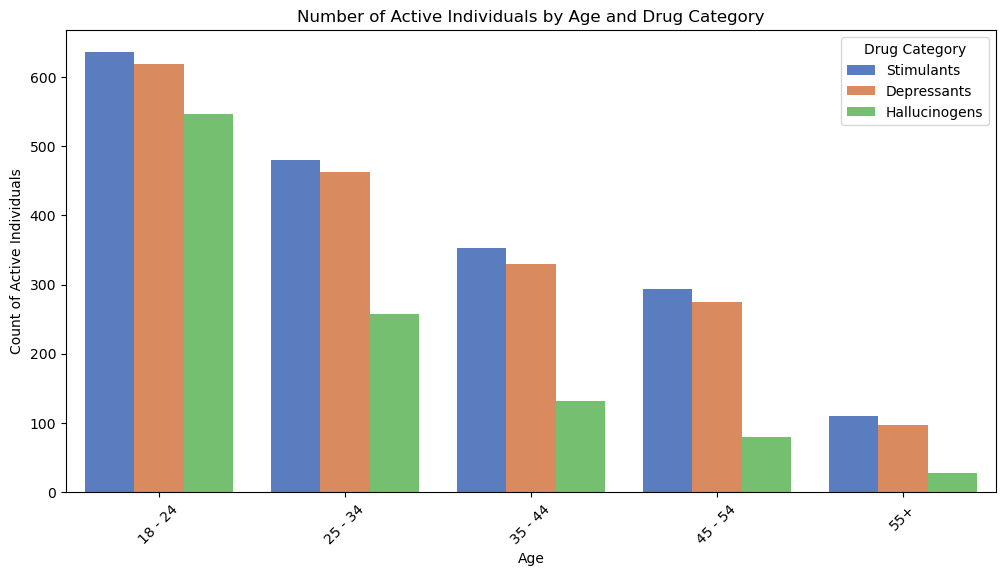

In [46]:
import seaborn as sns
melted_data = data_new.melt(id_vars='Age',
                        value_vars=['Stimulants', 'Depressants', 'Hallucinogens'],
                        var_name='Drug_Category',
                        value_name='Active_Status')

# Filter to only active individuals (Active_Status == 1)
active_data = melted_data[melted_data['Active_Status'] == 1]

# Count active individuals by age and drug category
active_counts = active_data.groupby(['Age', 'Drug_Category']).size().reset_index(name='Count')
active_counts = active_counts.sort_values(by='Count', ascending=False)
# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', hue='Drug_Category', data=active_counts, palette='muted')

# Customize the plot
plt.title('Number of Active Individuals by Age and Drug Category')
plt.ylabel('Count of Active Individuals')
plt.xlabel('Age')
plt.legend(title='Drug Category')
plt.xticks(rotation=45)
plt.show()

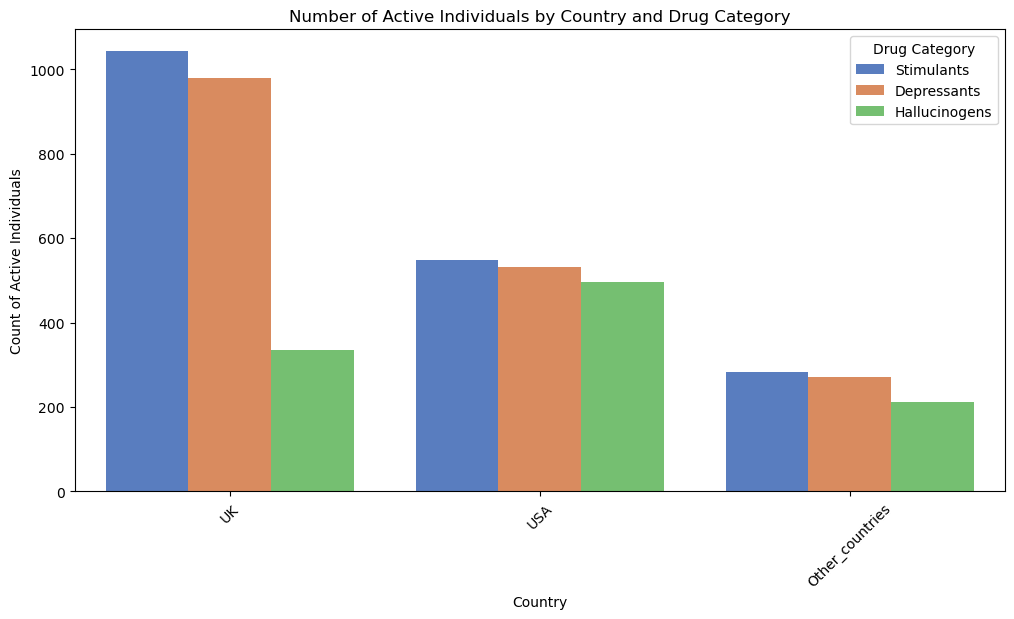

In [47]:
melted_data = data_new.melt(id_vars='Country',
                        value_vars=['Stimulants', 'Depressants', 'Hallucinogens'],
                        var_name='Drug_Category',
                        value_name='Active_Status')

# Filter to only active individuals (Active_Status == 1)
active_data = melted_data[melted_data['Active_Status'] == 1]

# Count active individuals by age and drug category
active_counts = active_data.groupby(['Country', 'Drug_Category']).size().reset_index(name='Count')
active_counts = active_counts.sort_values(by='Count', ascending=False)
# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Count', hue='Drug_Category', data=active_counts, palette='muted')

# Customize the plot
plt.title('Number of Active Individuals by Country and Drug Category')
plt.ylabel('Count of Active Individuals')
plt.xlabel('Country')
plt.legend(title='Drug Category')
plt.xticks(rotation=45)
plt.show()

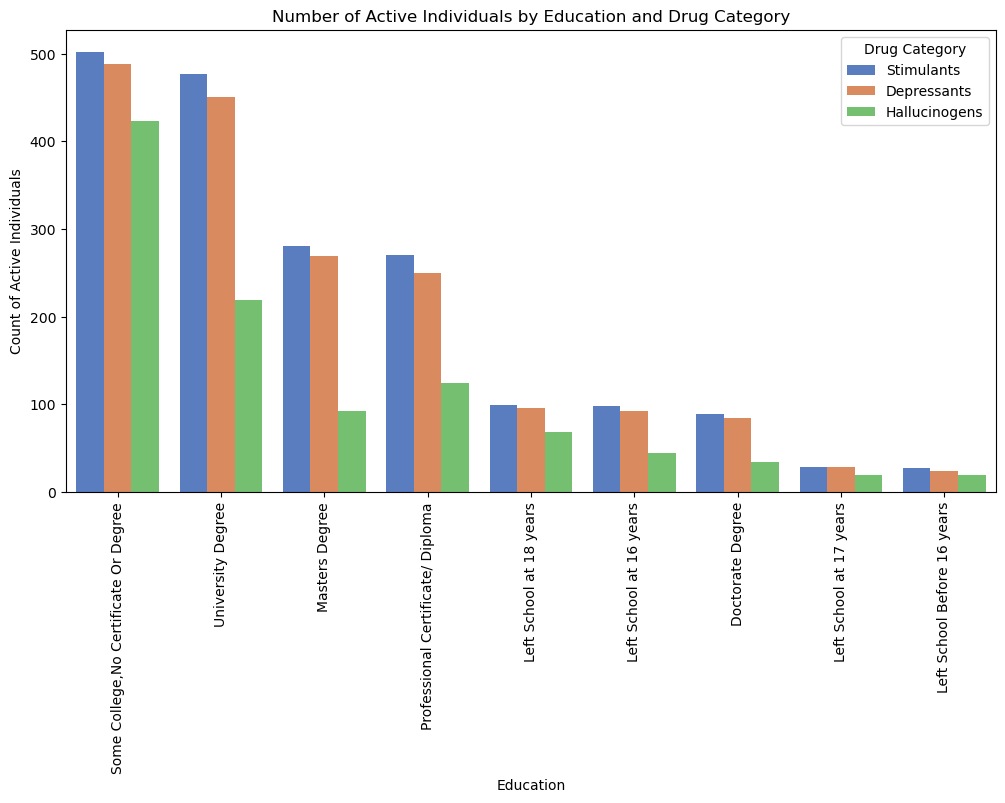

In [48]:
melted_data = data_new.melt(id_vars='Education',
                        value_vars=['Stimulants', 'Depressants', 'Hallucinogens'],
                        var_name='Drug_Category',
                        value_name='Active_Status')

# Filter to only active individuals (Active_Status == 1)
active_data = melted_data[melted_data['Active_Status'] == 1]

# Count active individuals by age and drug category
active_counts = active_data.groupby(['Education', 'Drug_Category']).size().reset_index(name='Count')
active_counts = active_counts.sort_values(by='Count', ascending=False)
# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Count', hue='Drug_Category', data=active_counts, palette='muted')

# Customize the plot
plt.title('Number of Active Individuals by Education and Drug Category')
plt.ylabel('Count of Active Individuals')
plt.xlabel('Education')
plt.legend(title='Drug Category')
plt.xticks(rotation=90)
plt.show()

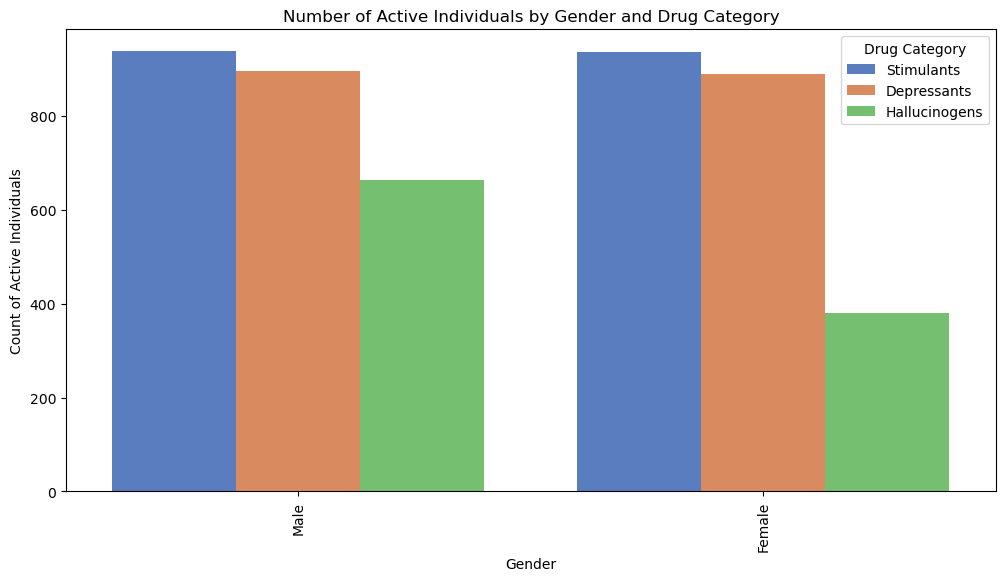

In [49]:
melted_data = data_new.melt(id_vars='Gender',
                        value_vars=['Stimulants', 'Depressants', 'Hallucinogens'],
                        var_name='Drug_Category',
                        value_name='Active_Status')

# Filter to only active individuals (Active_Status == 1)
active_data = melted_data[melted_data['Active_Status'] == 1]

# Count active individuals by age and drug category
active_counts = active_data.groupby(['Gender', 'Drug_Category']).size().reset_index(name='Count')
active_counts = active_counts.sort_values(by='Count', ascending=False)
# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Count', hue='Drug_Category', data=active_counts, palette='muted')

# Customize the plot
plt.title('Number of Active Individuals by Gender and Drug Category')
plt.ylabel('Count of Active Individuals')
plt.xlabel('Gender')
plt.legend(title='Drug Category')
plt.xticks(rotation=90)
plt.show()

In [50]:
stimulants_active_count = data_new[data_new['Stimulants'] == 1].shape[0]

In [51]:
stimulants_active_count

1873

In [52]:
depressants_active_count = data_new[data_new['Depressants'] == 1].shape[0]

In [53]:
depressants_active_count

1784

In [54]:
hallucinogens_active_count = data_new[data_new['Hallucinogens'] == 1].shape[0]
hallucinogens_active_count

1044

In [55]:
drug_categories=['Stimulants','Depressants','Hallucinogens']

In [56]:
data_to_split=data_new

In [57]:
data_without_categories.head()

,Age,Gender,Education,Country,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,...,Mushrooms,Nicotine,VSA,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category
0,35 - 44,Female,Professional Certificate/ Diploma,UK,1,0,0,0,1,0,...,0,0,0,High,Low,Low,Low,Low,Low,Very Low
1,25 - 34,Male,Doctorate Degree,UK,1,0,0,0,1,1,...,0,1,0,Low,Very High,Very High,High,Low,Low,Low
2,35 - 44,Male,Professional Certificate/ Diploma,UK,1,0,0,0,1,1,...,0,0,0,Low,High,Low,Very Low,Very Low,Very Low,High
3,18 - 24,Female,Masters Degree,UK,1,0,0,1,1,0,...,0,0,0,Low,Low,Low,High,High,Very Low,Very Low
4,35 - 44,Female,Doctorate Degree,UK,1,0,0,0,1,1,...,0,0,0,High,Very Low,Low,Low,Very High,Low,Low


# for ALL DRUGS

In [762]:
# from skmultilearn.adapt import MLkNN
# from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin, clone

In [763]:
class oneHot(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoder = OneHotEncoder(sparse=False, drop='first')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X, y=None):
        onehot_encoded = self.encoder.transform(X[self.columns])
        feature_names = self.encoder.get_feature_names_out()
        result_df = pd.DataFrame(onehot_encoded, columns=feature_names, index=X.index)
        return pd.concat([X.drop(columns=self.columns), result_df], axis=1)

In [764]:
education_categories = [
    ['Left School Before 16 years',
    'Left School at 16 years',
    'Left School at 17 years',
    'Left School at 18 years',
    'Some College,No Certificate Or Degree',
    'Professional Certificate/ Diploma',
    'University Degree',
    'Masters Degree',
    'Doctorate Degree']
]
age_categories = [
    ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55+']
]

nscore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

escore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

oscore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

ascore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

cscore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

impulsive_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

ss_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

In [765]:
class OrdinalEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, categories='auto'):
        self.columns = columns
        self.encoder = OrdinalEncoder(categories=categories)

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X, y=None):
        ordinal_encoded = self.encoder.transform(X[self.columns])
        feature_names = self.encoder.get_feature_names_out(self.columns)
        result_df = pd.DataFrame(ordinal_encoded, columns=feature_names, index=X.index)
        return pd.concat([X.drop(columns=self.columns), result_df], axis=1)
        
    def get_mappings(self):
        """Returns a dictionary mapping each column to its original categories and their corresponding ordinal values."""
        mappings = {}
        for i, column in enumerate(self.columns):
            mappings[column] = {category: index for index, category in enumerate(self.encoder.categories_[i])}
        return mappings

In [766]:
pipe = Pipeline([
    ('oneHot', oneHot(columns=['Gender', 'Country'])),
    ('ordinal_encoder', OrdinalEncoderTransformer(columns=[
        'Education', 'Age', 'Nscore_category', 'Escore_category', 
        'Oscore_category', 'Ascore_category', 'Cscore_category', 
        'Impulsive_category', 'SS_category'
    ], 
    categories=[
        education_categories[0], age_categories[0], nscore_categories[0], 
        escore_categories[0], oscore_categories[0], ascore_categories[0], 
        cscore_categories[0], impulsive_categories[0], ss_categories[0]
    ]))
])

In [767]:
X = data_without_categories.drop(drug_cols, axis=1)
y = data_without_categories[drug_cols] 

In [768]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [771]:
y_train.head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
1758,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
799,1,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1
208,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,1,0
1827,1,0,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0
1471,1,1,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0


In [772]:
x_train_pipe = pipe.fit_transform(x_train.copy())
x_test_pipe = pipe.transform(x_test.copy())

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [773]:
x_train_pipe.head()

,Gender_Male,Country_UK,Country_USA,Education,Age,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category
1758,0.0,1.0,0.0,5.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
799,1.0,0.0,0.0,3.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0
208,0.0,1.0,0.0,6.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
1827,0.0,0.0,0.0,6.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0
1471,1.0,0.0,0.0,4.0,3.0,3.0,1.0,1.0,0.0,2.0,3.0,3.0


In [776]:
value_counts_dict = {}

for drug in drug_cols:
    value_counts_dict[drug] = y_train[drug].value_counts()

# Convert the dictionary to a DataFrame for better visualization
value_counts_df = pd.DataFrame(value_counts_dict)

print(value_counts_df)

   Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  Ecstasy  \
0       87    1004  1221     942    46       622    34  1019   1257      954   
1     1226     309    92     371  1267       691  1279   294     56      359   

   Heroin  Ketamine  Legalh   LSD  Meth  Mushrooms  Nicotine   VSA  
0    1234      1173     916  1049  1094       1010       567  1249  
1      79       140     397   264   219        303       746    64  


In [784]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_units):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_units)
        self.layer2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x
    

In [785]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [786]:
X_train_tensor = torch.tensor(x_train_pipe.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32)

X_test_tensor = torch.tensor(x_test_pipe.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

In [787]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [788]:
input_shape = x_train_pipe.shape[1]
output_shape = y_train.shape[1]

In [789]:
model = MLP(input_shape, output_shape, 30)

In [790]:

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [791]:
def accuracy(y_true, y_pred):
    y_pred = y_pred.round()
    correct = (y_pred == y_true).float()  # Get a tensor of 1s and 0s
    acc = correct.sum() / correct.numel()  # Mean of correct predictions
    return acc

In [792]:
from tqdm.auto import tqdm

In [793]:
epochs = 100

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n ---------")

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        y_pred = model(X)

        loss = loss_fn(y_pred, y)

        train_acc += accuracy(y, y_pred)

        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 10 == 0:
            print(f"looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    test_loss, test_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X, y, in test_dataloader:

            test_pred = model(X)

            test_acc += accuracy(y, test_pred)
            test_loss += loss_fn(test_pred, y)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\ntrain loss: {train_loss} | train acc: {train_acc} | val loss: {test_loss} | val acc: {test_acc}\n")

            


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 
 ---------
looked at 0 / 1313 samples
looked at 320 / 1313 samples
looked at 640 / 1313 samples
looked at 960 / 1313 samples
looked at 1280 / 1313 samples

train loss: 0.6121243834495544 | train acc: 0.6916335225105286 | val loss: 0.4920708239078522 | val acc: 0.8063657283782959

Epoch: 1 
 ---------
looked at 0 / 1313 samples
looked at 320 / 1313 samples
looked at 640 / 1313 samples
looked at 960 / 1313 samples
looked at 1280 / 1313 samples

train loss: 0.42488089203834534 | train acc: 0.8224620819091797 | val loss: 0.4080755412578583 | val acc: 0.8256558775901794

Epoch: 2 
 ---------
looked at 0 / 1313 samples
looked at 320 / 1313 samples
looked at 640 / 1313 samples
looked at 960 / 1313 samples
looked at 1280 / 1313 samples

train loss: 0.39329206943511963 | train acc: 0.8300265073776245 | val loss: 0.3834015130996704 | val acc: 0.838580310344696

Epoch: 3 
 ---------
looked at 0 / 1313 samples
looked at 320 / 1313 samples
looked at 640 / 1313 samples
looked at 960 / 1313

# 4 MLP

In [89]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_units):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_units)
        self.layer2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x
    

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [90]:
X_train_tensor = torch.tensor(X_resampled.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled_filled.to_numpy(), dtype=torch.float32)

X_test_tensor = torch.tensor(x_test_pipe.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

In [91]:
X_train_tensor.dtype, y_train_tensor.dtype

(torch.float32, torch.float32)

In [92]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [93]:
input_shape = X_resampled.shape[1]
output_shape = y_train_resampled_filled.shape[1]

In [94]:
model = MLP(input_shape, output_shape, 30)

In [102]:

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [96]:
def accuracy(y_true, y_pred):
    y_pred = y_pred.round()
    correct = (y_pred == y_true).float()  # Get a tensor of 1s and 0s
    acc = correct.sum() / correct.numel()  # Mean of correct predictions
    return acc

In [97]:
from tqdm.auto import tqdm

In [103]:
epochs = 100

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n ---------")

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        y_pred = model(X)

        loss = loss_fn(y_pred, y)

        train_acc += accuracy(y, y_pred)

        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 10 == 0:
            print(f"looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    test_loss, test_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X, y, in test_dataloader:

            test_pred = model(X)

            test_acc += accuracy(y, test_pred)
            test_loss += loss_fn(test_pred, y)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\ntrain loss: {train_loss} | train acc: {train_acc} | val loss: {test_loss} | val acc: {test_acc}\n")

            


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 
 ---------


C:\Users\CC\anaconda3\Lib\site-packages\torch\autograd\__init__.py:266: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


looked at 0 / 2618 samples
looked at 320 / 2618 samples
looked at 640 / 2618 samples
looked at 960 / 2618 samples
looked at 1280 / 2618 samples
looked at 1600 / 2618 samples
looked at 1920 / 2618 samples
looked at 2240 / 2618 samples
looked at 2560 / 2618 samples

train loss: 0.648661196231842 | train acc: 0.6177396774291992 | val loss: 0.5958601832389832 | val acc: 0.716666579246521

Epoch: 1 
 ---------
looked at 0 / 2618 samples
looked at 320 / 2618 samples
looked at 640 / 2618 samples
looked at 960 / 2618 samples
looked at 1280 / 2618 samples
looked at 1600 / 2618 samples
looked at 1920 / 2618 samples
looked at 2240 / 2618 samples
looked at 2560 / 2618 samples

train loss: 0.5092856884002686 | train acc: 0.7528241872787476 | val loss: 0.4314184784889221 | val acc: 0.7930555939674377

Epoch: 2 
 ---------
looked at 0 / 2618 samples
looked at 320 / 2618 samples
looked at 640 / 2618 samples
looked at 960 / 2618 samples
looked at 1280 / 2618 samples
looked at 1600 / 2618 samples
looked

In [92]:
model.eval()

with torch.inference_mode():

    total_h_loss = 0
    total_acc = 0
    for X, y in test_dataloader:
        y_pred = model(X)
        acc = accuracy(y, y_pred)
        h_loss = hamming_loss(y, y_pred.round())
        total_h_loss += h_loss
        total_acc += acc
    print(total_h_loss/ len(test_dataloader))
    print(total_acc / len(test_dataloader))

    total_h_loss = 0
    total_acc = 0
    for X, y in train_dataloader:
        y_pred = model(X)
        acc = accuracy(y, y_pred)
        h_loss = hamming_loss(y, y_pred.round())
        total_h_loss += h_loss
        total_acc += acc
    print(total_h_loss/ len(train_dataloader))
    print(total_acc / len(train_dataloader))

0.0863425925925926
tensor(0.9137)
0.11189610694183869
tensor(0.8881)


In [93]:
y_train_resampled_filled['Stimulants'].value_counts()

Stimulants
1    1309
0    1309
Name: count, dtype: int64

In [94]:
y_train_resampled_filled['Depressants'].value_counts()

Depressants
0.0    1321
1.0    1297
Name: count, dtype: int64

In [95]:
y_train_resampled_filled['Hallucinogens'].value_counts()

Hallucinogens
1.0    1323
0.0    1295
Name: count, dtype: int64

# MLSMote

In [180]:
def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

In [182]:
X = pipe.fit_transform(X.copy())

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [183]:
X_sub, y_sub = get_minority_instace(X, y)   #Getting minority instance of that datframe
X_res,y_res =MLSMOTE(X_sub, y_sub, 100)     #Applying MLSMOTE to augment the dataframe

In [184]:
X_new = pd.concat([X, X_res], axis=0)
y_new = pd.concat([y, y_res], axis=0)

In [185]:
X_new.shape, y_new.shape

((3021, 12), (3021, 3))

In [189]:
y_new['Stimulants'].value_counts()

Stimulants
1.0    3016
0.0       5
Name: count, dtype: int64

# 3 Multilabel classification

## Binary Relevance : Treat each label (e.g., Stimulants, Depressants, Hallucinogens) as a separate binary classification problem.

In [58]:
# from skmultilearn.adapt import MLkNN
# from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin, clone

In [59]:
class oneHot(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoder = OneHotEncoder(sparse=False, drop='first')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X, y=None):
        onehot_encoded = self.encoder.transform(X[self.columns])
        feature_names = self.encoder.get_feature_names_out()
        result_df = pd.DataFrame(onehot_encoded, columns=feature_names, index=X.index)
        return pd.concat([X.drop(columns=self.columns), result_df], axis=1)

In [60]:
education_categories = [
    ['Left School Before 16 years',
    'Left School at 16 years',
    'Left School at 17 years',
    'Left School at 18 years',
    'Some College,No Certificate Or Degree',
    'Professional Certificate/ Diploma',
    'University Degree',
    'Masters Degree',
    'Doctorate Degree']
]
age_categories = [
    ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55+']
]

nscore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

escore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

oscore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

ascore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

cscore_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

impulsive_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

ss_categories = [
    ["Very Low", "Low", "High", "Very High"]
]

In [61]:
class OrdinalEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, categories='auto'):
        self.columns = columns
        self.encoder = OrdinalEncoder(categories=categories)

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X, y=None):
        ordinal_encoded = self.encoder.transform(X[self.columns])
        feature_names = self.encoder.get_feature_names_out(self.columns)
        result_df = pd.DataFrame(ordinal_encoded, columns=feature_names, index=X.index)
        return pd.concat([X.drop(columns=self.columns), result_df], axis=1)
        
    def get_mappings(self):
        """Returns a dictionary mapping each column to its original categories and their corresponding ordinal values."""
        mappings = {}
        for i, column in enumerate(self.columns):
            mappings[column] = {category: index for index, category in enumerate(self.encoder.categories_[i])}
        return mappings

In [62]:
pipe = Pipeline([
    ('oneHot', oneHot(columns=['Gender', 'Country'])),
    ('ordinal_encoder', OrdinalEncoderTransformer(columns=[
        'Education', 'Age', 'Nscore_category', 'Escore_category', 
        'Oscore_category', 'Ascore_category', 'Cscore_category', 
        'Impulsive_category', 'SS_category'
    ], 
    categories=[
        education_categories[0], age_categories[0], nscore_categories[0], 
        escore_categories[0], oscore_categories[0], ascore_categories[0], 
        cscore_categories[0], impulsive_categories[0], ss_categories[0]
    ]))
])

In [63]:
X = data_to_split.drop(drug_categories, axis=1)
y = data_to_split[drug_categories] 

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
x_train_pipe = pipe.fit_transform(x_train.copy())
x_test_pipe = pipe.transform(x_test.copy())

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [873]:
# from skmultilearn.adapt import MLkNN

In [ ]:
# classifier = MLkNN(k=5)

# # Fit the model
# classifier.fit(np.array(x_train_pipe), np.array(y_train))

# # Predict on the test set
# y_pred = classifier.predict(x_test_pipe.to_numpy())
# y_pred = y_pred.toarray()
# # Evaluate the model using Hamming loss
# hamming = hamming_loss(y_test, y_pred)
# print(f'Hamming Loss: {hamming:.4f}')

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')

In [1022]:
label_matrix=np.array(y_train)

In [1023]:
label_matrix

array([[1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1]], dtype=int64)

In [1024]:
df_corr = pd.DataFrame(label_matrix)
correlation_matrix = df_corr.corr(method='pearson') 

In [1025]:
correlation_matrix

,0,1,2
0,1.000000,0.191672,0.033861
1,0.191672,1.000000,0.117334
2,0.033861,0.117334,1.000000


In [416]:
minority_class

(0, 1, 1)

In [468]:

# # Assuming X and y are your features and labels
# num_samples = X.shape[0]

# # Randomly select 80% of the indices for the training set
# train_size = int(num_samples * 0.8)
# train_indices = np.random.choice(num_samples, size=train_size, replace=False)

# # Create a boolean mask for training indices
# mask = np.zeros(num_samples, dtype=bool)
# mask[train_indices] = True

# # Create training and testing sets
# x_train = X[mask]
# y_train = y[mask]
# x_test = X[~mask]
# y_test = y[~mask]

In [66]:
y_test['Stimulants'].value_counts()

Stimulants
1    564
Name: count, dtype: int64

In [67]:
encoder_transformer = pipe.named_steps['ordinal_encoder']
mappings = encoder_transformer.get_mappings()
print(mappings)

{'Education': {'Left School Before 16 years': 0, 'Left School at 16 years': 1, 'Left School at 17 years': 2, 'Left School at 18 years': 3, 'Some College,No Certificate Or Degree': 4, 'Professional Certificate/ Diploma': 5, 'University Degree': 6, 'Masters Degree': 7, 'Doctorate Degree': 8}, 'Age': {'18 - 24': 0, '25 - 34': 1, '35 - 44': 2, '45 - 54': 3, '55+': 4}, 'Nscore_category': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3}, 'Escore_category': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3}, 'Oscore_category': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3}, 'Ascore_category': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3}, 'Cscore_category': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3}, 'Impulsive_category': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3}, 'SS_category': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3}}


In [68]:
y_train.shape

(1313, 3)

In [69]:
y_train['Stimulants'].value_counts()

Stimulants
1    1309
0       4
Name: count, dtype: int64

In [70]:
y_train['Depressants'].value_counts()

Depressants
1    1256
0      57
Name: count, dtype: int64

In [71]:
y_train['Hallucinogens'].value_counts()

Hallucinogens
1    728
0    585
Name: count, dtype: int64

In [66]:
x_test_pipe.shape

(564, 12)

In [67]:
#rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
smote = SMOTE(random_state=42, k_neighbors=1)
# Apply SMOTE to each label separately
X_resampled, y_stimulants_resampled = smote.fit_resample(x_train_pipe, y_train['Stimulants'])
_, y_depressants_resampled = smote.fit_resample(x_train_pipe, y_train['Depressants'])
_, y_hallucinogens_resampled = smote.fit_resample(x_train_pipe, y_train['Hallucinogens'])

# Combine the resampled labels into a single DataFrame
y_train_resampled = pd.DataFrame({
    'Stimulants': y_stimulants_resampled,
    'Depressants': y_depressants_resampled,
    'Hallucinogens': y_hallucinogens_resampled
})


In [68]:
y_train_resampled

,Stimulants,Depressants,Hallucinogens
0,1,1.0,0.0
1,1,1.0,1.0
2,1,1.0,1.0
3,1,1.0,1.0
4,1,1.0,1.0
...,...,...,...
2613,0,NaN,NaN
2614,0,NaN,NaN
2615,0,NaN,NaN
2616,0,NaN,NaN


In [69]:
def fill_nan_randomly(series, prob_active=0.5):
    """
    Randomly fill NaN values in a series with 0 or 1.

    Args:
    - series: The Pandas Series to fill.
    - prob_active: The probability of filling NaN with 1 (active).

    Returns:
    - The series with NaN values filled.
    """
    # Generate random values with given probability
    random_values = np.random.choice([0, 1], size=len(series), p=[1 - prob_active, prob_active])
    
    # Replace NaNs with these random values
    series_filled = series.fillna(pd.Series(random_values, index=series.index))
    
    return series_filled

# Apply the function to each column in your target DataFrame
y_train_resampled_filled = y_train_resampled.apply(fill_nan_randomly, prob_active=0.5)


In [70]:
y_train_resampled_filled

,Stimulants,Depressants,Hallucinogens
0,1,1.0,0.0
1,1,1.0,1.0
2,1,1.0,1.0
3,1,1.0,1.0
4,1,1.0,1.0
...,...,...,...
2613,0,0.0,1.0
2614,0,0.0,1.0
2615,0,0.0,0.0
2616,0,0.0,1.0


In [71]:
X_resampled

,Gender_Male,Country_UK,Country_USA,Education,Age,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category
0,0.000000,1.000000,0.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.0,2.000000,2.000000
1,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000,3.000000
2,0.000000,1.000000,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.0,2.000000,3.000000
3,0.000000,0.000000,0.000000,6.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.0,1.000000,1.000000
4,1.000000,0.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,0.000000,2.0,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2613,1.000000,0.198633,0.801367,4.397266,1.602734,1.198633,1.198633,1.000000,0.801367,2.0,1.397266,1.397266
2614,0.233411,0.766589,0.233411,6.299766,2.000000,1.000000,1.000000,1.000000,1.766589,2.0,1.000000,0.233411
2615,1.000000,0.266384,0.733616,4.532768,1.467232,1.266384,1.266384,1.000000,0.733616,2.0,1.532768,1.532768
2616,0.299444,0.700556,0.299444,7.000000,2.598887,0.700556,1.299444,1.299444,2.000000,2.0,1.299444,0.299444


<BarContainer object of 2 artists>

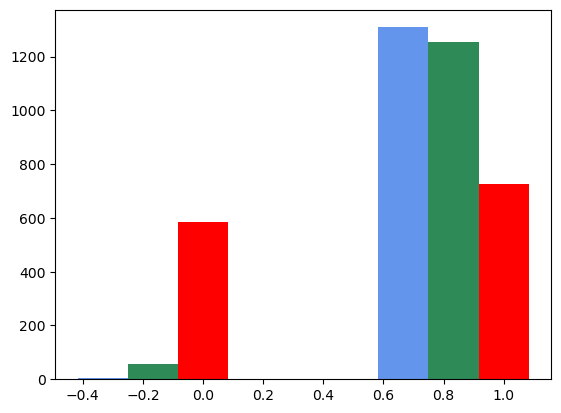

In [78]:
# fig, ax = plt.subplots()

# d_heights, d_bins = np.histogram(y_train['Stimulants'],bins=[-0.5,0.5,1.5])
# m_heights, m_bins = np.histogram(y_train['Depressants'], bins=d_bins)
# s_heights, s_bins = np.histogram(y_train['Hallucinogens'], bins=m_bins)



# width = (d_bins[1] - d_bins[0])/6.0

# ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue')
# ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen')
# ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red')


In [83]:
# positive_weights = {}
# negative_weights = {}
# for c in drug_categories:
#     positive_weights[c] = y_train.shape[0]/(2*np.count_nonzero(y_train[c]==1))
#     negative_weights[c] = y_train.shape[0]/(2*np.count_nonzero(y_train[c]==0))
# print(positive_weights)
# print(negative_weights)


{'Stimulants': 0.501527883880825, 'Depressants': 0.5226910828025477, 'Hallucinogens': 0.9017857142857143}
{'Stimulants': 164.125, 'Depressants': 11.517543859649123, 'Hallucinogens': 1.1222222222222222}


In [99]:
# import tensorflow.keras.backend as K

In [85]:
# def loss_fn1(y_true,y_pred):
#     loss = 0
#     loss -= (positive_weights['Stimulants']*y_true[0]*K.log(y_pred[0]) + negative_weights['Stimulants']*(1-y_true[0])*K.log(1-y_pred[0]))
#     loss -= (positive_weights['Depressants']*y_true[1]*K.log(y_pred[1]) + negative_weights['Depressants']*(1-y_true[1])*K.log(1-y_pred[1]))
#     loss -= (positive_weights['Hallucinogens']*y_true[2]*K.log(y_pred[2]) + negative_weights['Hallucinogens']*(1-y_true[2])*K.log(1-y_pred[2]))
#     return loss

# MLkNN

In [72]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix

In [86]:
X_resampled_new = X_resampled.to_numpy()
y_train_resampled_filled_new = y_train_resampled_filled.to_numpy()
# Initialize the MLkNN classifier
mlknn = MLkNN()  # k is the number of neighbors, you can adjust it

# Train the classifier
mlknn.fit(X_resampled_new, y_train_resampled_filled_new)

# Make predictions on the test set
y_pred = mlknn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=drug_categories)

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming}")
print("Classification Report:")
print(classification_rep)

TypeError: NearestNeighbors.__init__() takes 1 positional argument but 2 were given

# Binary relevance

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, hamming_loss


In [ ]:
X_resampled_new = np.array(X_resampled)
y_train_resampled_filled_new = np.array(y_train_resampled_filled)

# Define the parameters to tune for RandomForestClassifier
parameters = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [100, 150, 300, 500],
    'classifier__max_depth': [6, 8, 10, 12],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
}

# Custom scorer based on Hamming Loss
def hamming_loss_scorer(y_true, y_pred):
    return hamming_loss(y_true, y_pred)

scorer = make_scorer(hamming_loss_scorer, greater_is_better=False)

# Initialize GridSearchCV
clf = GridSearchCV(BinaryRelevance(), parameters, scoring=scorer, cv=3)

# Fit the model
clf.fit(X_resampled_new, y_train_resampled_filled_new)

# Output the best parameters and score
print("Best parameters:", clf.best_params_)
print("Best Hamming loss:", clf.best_score_)

In [101]:
# from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score

# y_pred = clf.best_estimator_.predict(x_test_pipe)

# # Calculate and print metrics
# accuracy = accuracy_score(y_test, y_pred)
# hamming_loss_value = hamming_loss(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='micro')
# recall = recall_score(y_test, y_pred, average='micro')
# f1 = f1_score(y_test, y_pred, average='micro')

# print("Test set accuracy:", accuracy)
# print("Test set Hamming loss:", hamming_loss_value)
# print("Test set precision (micro):", precision)
# print("Test set recall (micro):", recall)
# print("Test set F1 score (micro):", f1)

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Test set accuracy: 0.7411347517730497
Test set Hamming loss: 0.09219858156028368
Test set precision (micro): 0.9458689458689459
Test set recall (micro): 0.9431818181818182
Test set F1 score (micro): 0.9445234708392604


In [110]:
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score

y_pred = clf.best_estimator_.predict(x_test_pipe)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Test set accuracy:", accuracy)
print("Test set Hamming loss:", hamming_loss_value)
print("Test set precision (micro):", precision)
print("Test set recall (micro):", recall)
print("Test set F1 score (micro):", f1)

Test set accuracy: 0.7641843971631206
Test set Hamming loss: 0.08215130023640661
Test set precision (micro): 0.9433962264150944
Test set recall (micro): 0.9588068181818182
Test set F1 score (micro): 0.9510390982740403


C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [111]:
y_train_pred = clf.best_estimator_.predict(X_resampled)
train_accuracy = accuracy_score(y_train_resampled_filled, y_train_pred)
train_hamming_loss = hamming_loss(y_train_resampled_filled, y_train_pred)
train_precision = precision_score(y_train_resampled_filled, y_train_pred, average='micro')
train_recall = recall_score(y_train_resampled_filled, y_train_pred, average='micro')
train_f1 = f1_score(y_train_resampled_filled, y_train_pred, average='micro')

print("Training set accuracy:", train_accuracy)
print("Training set Hamming loss:", train_hamming_loss)
print("Training set precision (micro):", train_precision)
print("Training set recall (micro):", train_recall)
print("Training set F1 score (micro):", train_f1)

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training set accuracy: 0.838044308632544
Training set Hamming loss: 0.05627705627705628
Training set precision (micro): 0.9515498827819745
Training set recall (micro): 0.9345101048861602
Training set F1 score (micro): 0.9429530201342281


In [103]:
# y_train_pred = clf.best_estimator_.predict(X_resampled)
# train_accuracy = accuracy_score(y_train_resampled_filled, y_train_pred)
# train_hamming_loss = hamming_loss(y_train_resampled_filled, y_train_pred)
# train_precision = precision_score(y_train_resampled_filled, y_train_pred, average='micro')
# train_recall = recall_score(y_train_resampled_filled, y_train_pred, average='micro')
# train_f1 = f1_score(y_train_resampled_filled, y_train_pred, average='micro')

# print("Training set accuracy:", train_accuracy)
# print("Training set Hamming loss:", train_hamming_loss)
# print("Training set precision (micro):", train_precision)
# print("Training set recall (micro):", train_recall)
# print("Training set F1 score (micro):", train_f1)

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Training set accuracy: 0.6913674560733384
Training set Hamming loss: 0.10707919531448944
Training set precision (micro): 0.9402985074626866
Training set recall (micro): 0.8380660015349194
Training set F1 score (micro): 0.8862437440822399


In [ ]:
parameters = {
    'classifier': [SVC()],
    'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__degree': [2, 3, 4],
}

# Custom scorer based on Hamming Loss
def hamming_loss_scorer(y_true, y_pred):
    return hamming_loss(y_true, y_pred)

scorer = make_scorer(hamming_loss_scorer, greater_is_better=False)

# Initialize GridSearchCV
clf = GridSearchCV(BinaryRelevance(), parameters, scoring=scorer, cv=3)

# Fit the model
clf.fit(X_resampled_new, y_train_resampled_filled_new)

# Output the best parameters and score
print("Best parameters:", clf.best_params_)
print("Best Hamming loss:", clf.best_score_)

# TEST!!!!!!!!!

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

In [488]:
rf = RandomForestClassifier(n_jobs=-1)
multi_target_classifier = MultiOutputClassifier(rf, n_jobs=-1)
multi_target_classifier.fit(X_resampled, y_train_resampled_filled)

MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1)

In [489]:
y_pred = multi_target_classifier.predict(x_test_pipe)

# Hamming Loss: Lower is better (0 is perfect)
hl = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hl:.4f}')

# Subset Accuracy: Higher is better (1 is perfect)
subset_acc = accuracy_score(y_test, y_pred)
print(f'Subset Accuracy: {subset_acc:.4f}')

# Precision, Recall, F1-Score
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Stimulants', 'Depressants', 'Hallucinogens'], zero_division=0))

# Jaccard Score (averaged across all labels)
jaccard = jaccard_score(y_test, y_pred, average='samples')
print(f'Jaccard Score: {jaccard:.4f}')

Hamming Loss: 0.0842
Subset Accuracy: 0.7686
Classification Report:
               precision    recall  f1-score   support

   Stimulants       0.99      1.00      1.00       374
  Depressants       0.95      1.00      0.98       358
Hallucinogens       0.81      0.82      0.81       199

    micro avg       0.94      0.96      0.95       931
    macro avg       0.92      0.94      0.93       931
 weighted avg       0.94      0.96      0.95       931
  samples avg       0.94      0.96      0.94       931



NameError: name 'jaccard_score' is not defined

In [484]:
y_pred = multi_target_classifier.predict(x_test_pipe)

# Hamming Loss: Lower is better (0 is perfect)
hl = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hl:.4f}')

# Subset Accuracy: Higher is better (1 is perfect)
subset_acc = accuracy_score(y_test, y_pred)
print(f'Subset Accuracy: {subset_acc:.4f}')

# Precision, Recall, F1-Score
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Stimulants', 'Depressants', 'Hallucinogens'], zero_division=0))

# Jaccard Score (averaged across all labels)
jaccard = jaccard_score(y_test, y_pred, average='samples')
print(f'Jaccard Score: {jaccard:.4f}')

Hamming Loss: 0.0816
Subset Accuracy: 0.7793
Classification Report:
               precision    recall  f1-score   support

   Stimulants       0.99      1.00      1.00       374
  Depressants       0.95      1.00      0.98       358
Hallucinogens       0.82      0.81      0.82       199

    micro avg       0.94      0.96      0.95       931
    macro avg       0.92      0.94      0.93       931
 weighted avg       0.94      0.96      0.95       931
  samples avg       0.95      0.96      0.95       931



NameError: name 'jaccard_score' is not defined

In [486]:
X_resampled= np.round(X_resampled)

In [487]:
X_resampled

,Gender_Male,Country_UK,Country_USA,Education,Age,Nscore_category,Escore_category,Oscore_category,Ascore_category,Cscore_category,Impulsive_category,SS_category
0,0.0,1.0,0.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,1.0,0.0,5.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0
2,0.0,1.0,0.0,7.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0
3,0.0,0.0,0.0,3.0,4.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0
4,1.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1.0,0.0,1.0,7.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
2994,1.0,1.0,0.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0
2995,1.0,1.0,0.0,6.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0
2996,1.0,1.0,0.0,6.0,1.0,2.0,2.0,1.0,0.0,2.0,3.0,3.0


In [348]:
y_pred = multi_target_classifier.predict(x_test_pipe)

# Hamming Loss: Lower is better (0 is perfect)
hl = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hl:.4f}')

# Subset Accuracy: Higher is better (1 is perfect)
subset_acc = accuracy_score(y_test, y_pred)
print(f'Subset Accuracy: {subset_acc:.4f}')

# Precision, Recall, F1-Score
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Stimulants', 'Depressants', 'Hallucinogens'], zero_division=0))

# Jaccard Score (averaged across all labels)
jaccard = jaccard_score(y_test, y_pred, average='samples')
print(f'Jaccard Score: {jaccard:.4f}')

Hamming Loss: 0.0863
Subset Accuracy: 0.7500
Classification Report:
               precision    recall  f1-score   support

   Stimulants       1.00      1.00      1.00       564
  Depressants       0.94      1.00      0.97       528
Hallucinogens       0.84      0.81      0.83       316

    micro avg       0.94      0.96      0.95      1408
    macro avg       0.93      0.94      0.93      1408
 weighted avg       0.94      0.96      0.95      1408
  samples avg       0.94      0.96      0.94      1408



NameError: name 'jaccard_score' is not defined

In [335]:
y_train_resampled_filled['Hallucinogens'].value_counts()

Hallucinogens
0.0    1330
1.0    1288
Name: count, dtype: int64

In [334]:
y_train_resampled['Hallucinogens'].value_counts()

Hallucinogens
0.0    728
1.0    728
Name: count, dtype: int64

In [329]:
X_resampled.shape

(2618, 12)

In [91]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss, f1_score
from sklearn.svm import SVC

In [342]:
clf = OneVsRestClassifier(SVC()).fit(X_resampled, y_train_resampled_filled)

In [343]:
metrics=evaluate_model(clf, x_test_pipe, y_test)
print_metrics(metrics)

Hamming Loss: 0.1087

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |         0   |  0       |   0        |         0 |
+--------------+-------------+----------+------------+-----------+
| 1            |         1   |  0.95922 |   0.979186 |       564 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |         0.5 |  0.47961 |   0.489593 |       564 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |         1   |  0.95922 |   0.979186 |       564 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+-----------+------------+-----------+
| Label        |   Precision |    Recall |   F1-Score |   Support |
+==============+=============+

In [344]:
metrics=evaluate_model(clf, X_resampled, y_train_resampled_filled)
print_metrics(metrics)

Hamming Loss: 0.1206

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0.0          |    0.981259 | 1        |   0.990541 |      1309 |
+--------------+-------------+----------+------------+-----------+
| 1.0          |    1        | 0.980901 |   0.990359 |      1309 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.99063  | 0.990451 |   0.99045  |      2618 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.99063  | 0.990451 |   0.99045  |      2618 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, f1_score, accuracy_score,classification_report

In [70]:
baseline_rf=RandomForestClassifier(random_state=0,n_jobs=-1).fit(x_train_pipe,y_train)

In [71]:
y_test_pred_baseline=baseline_rf.predict(x_test_pipe)

In [72]:
y_test_pred_baseline[:5]

array([[1, 1, 1],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0]], dtype=int64)

In [75]:
print(classification_report(y_test,y_test_pred_baseline))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       564
           1       0.94      1.00      0.97       528
           2       0.85      0.80      0.83       316

   micro avg       0.94      0.96      0.95      1408
   macro avg       0.93      0.93      0.93      1408
weighted avg       0.94      0.96      0.95      1408
 samples avg       0.94      0.96      0.94      1408



In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, f1_score, accuracy_score,classification_report

In [337]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    import numpy as np
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    
    if y_test.shape[1] != y_pred.shape[1]:
        raise ValueError("The number of outputs in y_test and y_pred do not match.")
    accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    average_accuracy = sum(accuracies) / len(accuracies)
    hamming_loss_value = hamming_loss(y_test, y_pred)
   
    
    classification_reports = [
        classification_report(
            y_test[:, i], 
            y_pred[:, i], 
            output_dict=True, 
            zero_division=0  
        ) for i in range(y_test.shape[1])
    ]
    metrics = {
       # 'accuracy': accuracies,
        'hamming_loss': hamming_loss_value,
        'classification_reports': classification_reports
    }
    return metrics


In [338]:
from tabulate import tabulate
from sklearn.metrics import classification_report

def print_metrics(metrics):
    #print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Hamming Loss: {metrics['hamming_loss']:.4f}")
    for i, report in enumerate(metrics['classification_reports']):
        print(f"\nClassification Report for Output {i}:\n")
        report_table = []
        for label, metrics in report.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                report_table.append([label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
        for avg_type in ['macro avg', 'weighted avg']:
            if avg_type in report:
                metrics = report[avg_type]
                report_table.append([avg_type, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
        print(tabulate(report_table, headers=['Label', 'Precision', 'Recall', 'F1-Score', 'Support'], tablefmt='grid'))



In [71]:
param_grid = {
    'estimator__n_estimators': [300],
    'estimator__max_depth': [6],
    'estimator__min_samples_split': [3,5],
    'estimator__min_samples_leaf': [4]
}

In [284]:
rf_multi = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_multi_grid = GridSearchCV(estimator=rf_multi, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf_multi_grid.fit(x_train_pipe, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [6],
                         'estimator__min_samples_leaf': [4],
                         'estimator__min_samples_split': [3, 5],
                         'estimator__n_estimators': [300]},
             verbose=2)

In [285]:
rf_multi_grid.best_params_

{'estimator__max_depth': 6,
 'estimator__min_samples_leaf': 4,
 'estimator__min_samples_split': 3,
 'estimator__n_estimators': 300}

In [286]:
best_model=rf_multi_grid.best_estimator_
metrics=evaluate_model(best_model, x_test_pipe, y_test)
print_metrics(metrics)

Average Accuracy: 0.9143
Hamming Score: 0.9143

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 1            |           1 |        1 |          1 |       564 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |           1 |        1 |          1 |       564 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |           1 |        1 |          1 |       564 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |    0        |  0       |   0        |        36 |
+-----

In [287]:
metrics=evaluate_model(best_model, x_train_pipe, y_train)
print_metrics(metrics)

Average Accuracy: 0.9403
Hamming Score: 0.9403

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |    0        | 0        |   0        |         4 |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.996954 | 1        |   0.998474 |      1309 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.498477 | 0.5      |   0.499237 |      1313 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.993916 | 0.996954 |   0.995433 |      1313 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+=====

In [582]:
class SMOTETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=None):
        self.smote = SMOTE(random_state=random_state)

    def fit(self, X, y):
        return self  # No fitting necessary for SMOTE

    def transform(self, X, y):
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return X_resampled, y_resampled
smote_transformer = SMOTETransformer(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = smote_transformer.fit_transform(x_train_pipe, y_train)

# Create a OneVsRestClassifier with a DecisionTreeClassifier
classifier = OneVsRestClassifier(DecisionTreeClassifier(class_weight='balanced'))
classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = classifier.predict(x_test_pipe)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

TypeError: SMOTETransformer.transform() missing 1 required positional argument: 'y'

## onevsrest

In [206]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss, f1_score
from sklearn.svm import SVC

In [73]:
clf = OneVsRestClassifier(SVC(class_weight='balanced')).fit(x_train_pipe, y_train)

In [74]:
metrics=evaluate_model(clf, x_test_pipe, y_test)
print_metrics(metrics)

Hamming Loss: 0.1608

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |         0   | 0        |   0        |         0 |
+--------------+-------------+----------+------------+-----------+
| 1            |         1   | 0.97695  |   0.988341 |       564 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |         0.5 | 0.488475 |   0.49417  |       564 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |         1   | 0.97695  |   0.988341 |       564 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==

In [75]:
metrics=evaluate_model(clf, x_test_pipe, y_test)
print_metrics(metrics)

Hamming Loss: 0.1608

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |         0   | 0        |   0        |         0 |
+--------------+-------------+----------+------------+-----------+
| 1            |         1   | 0.97695  |   0.988341 |       564 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |         0.5 | 0.488475 |   0.49417  |       564 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |         1   | 0.97695  |   0.988341 |       564 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==

In [90]:
x_test_pipe.iloc[2],y_test.iloc[2]

(Gender_Male           1.0
 Country_UK            0.0
 Country_USA           1.0
 Education             6.0
 Age                   2.0
 Nscore_category       3.0
 Escore_category       0.0
 Oscore_category       2.0
 Ascore_category       2.0
 Cscore_category       1.0
 Impulsive_category    1.0
 SS_category           2.0
 Name: 1328, dtype: float64,
 Stimulants       1
 Depressants      1
 Hallucinogens    1
 Name: 1328, dtype: int64)

In [91]:
clf.predict([[1,0,1,6,2,3,0,2,2,1,1,2]])

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\CC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1]])

In [320]:
from sklearn.neighbors import NearestNeighbors

def mlsmote(X, y, n_samples):
    """
    Applies MLSMOTE to generate synthetic samples for multilabel data.
    
    Parameters:
    X (pd.DataFrame): Input feature matrix
    y (pd.DataFrame): Multilabel target matrix
    n_samples (int): Number of synthetic samples to generate
    
    Returns:
    pd.DataFrame: Augmented feature matrix
    pd.DataFrame: Augmented target matrix
    """
    n_neighbors = 5
    
    # Find nearest neighbors for each sample
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    neigh.fit(X)
    distances, indices = neigh.kneighbors(X)
    
    # Initialize arrays for synthetic samples
    X_new = np.zeros((n_samples, X.shape[1]))
    y_new = np.zeros((n_samples, y.shape[1]))
    
    for i in range(n_samples):
        # Select a random minority class sample
        ref_idx = np.random.randint(0, X.shape[0])
        
        # Select a random neighbor of the reference sample
        neighbor_idx = indices[ref_idx, np.random.randint(1, n_neighbors)]
        
        # Generate a new sample between the reference and neighbor
        gap = X.iloc[ref_idx] - X.iloc[neighbor_idx]
        ratio = np.random.random()
        X_new[i] = X.iloc[ref_idx] + ratio * gap
        
        # Determine the target labels for the new sample
        ref_labels = y.iloc[ref_idx]
        neighbor_labels = y.iloc[neighbor_idx]
        new_labels = (ref_labels + neighbor_labels) / 2
        y_new[i] = np.where(new_labels >= 0.5, 1, 0)
    
    # Concatenate the original and synthetic samples
    X_aug = pd.concat([X, pd.DataFrame(X_new, columns=X.columns)], ignore_index=True)
    y_aug = pd.concat([y, pd.DataFrame(y_new, columns=y.columns)], ignore_index=True)
    
    return X_aug, y_aug

In [321]:
X_aug, y_aug = mlsmote(x_train_pipe, y_train, n_samples=100)

In [330]:
y_aug['Stimulants'].value_counts()

Stimulants
1.0    1409
0.0       4
Name: count, dtype: int64

## Test

In [1150]:
# smote = SMOTE()
# x_train_stimulants_resampled, y_train_stimulants_resampled = smote.fit_resample(x_train_pipe, y_train['Stimulants'])

# # Now match 'Depressants' to the size of x_train_stimulants_resampled
# x_train_resampled, y_train_depressants_resampled = smote.fit_resample(x_train_stimulants_resampled, y_train['Depressants'])

# # Combine the resampled 'Stimulants' and 'Depressants'
# y_train_resampled = pd.DataFrame({
#     'Stimulants': y_train_stimulants_resampled,
#     'Depressants': y_train_depressants_resampled
# })

In [1151]:
# Resample 'Stimulants'
smote = SMOTE()
x_train_stimulants_resampled, y_train_stimulants_resampled = smote.fit_resample(x_train_pipe, y_train['Stimulants'])

# Resample 'Depressants' separately
x_train_depressants_resampled, y_train_depressants_resampled = smote.fit_resample(x_train_pipe, y_train['Depressants'])

# Determine the minimum number of samples between the two resampled datasets
min_samples = max(len(y_train_stimulants_resampled), len(y_train_depressants_resampled))

# Randomly sample the same number of samples from both resampled datasets
x_train_final = x_train_stimulants_resampled[:2612]
y_train_stimulants_final = y_train_stimulants_resampled[:2612]
y_train_depressants_final = y_train_depressants_resampled[:2612]

# Combine the final targets
y_train_final = pd.DataFrame({
    'Stimulants': y_train_stimulants_final,
    'Depressants': y_train_depressants_final
})

# Verify the results
print(y_train_final['Stimulants'].value_counts())
print(y_train_final['Depressants'].value_counts())

Stimulants
1    1306
0    1306
Name: count, dtype: int64
Depressants
1.0    1150
0.0    1150
Name: count, dtype: int64


In [1162]:
y_train_final

,Stimulants,Depressants
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
2607,0,NaN
2608,0,NaN
2609,0,NaN
2610,0,NaN


In [1163]:
x_train_final

,Gender_Male,Country_UK,Country_USA,Age_25 - 34,Age_35 - 44,Age_45 - 54,Age_55+,Education_Left School Before 16 years,Education_Left School at 16 years,Education_Left School at 17 years,...,Ascore_category_Very Low,Cscore_category_Low,Cscore_category_Very High,Cscore_category_Very Low,Impulsive_category_Low,Impulsive_category_Very High,Impulsive_category_Very Low,SS_category_Low,SS_category_Very High,SS_category_Very Low
0,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
2,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.000000,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.0,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,0.000000,0.151047,0.848953,0.848953,0.151047,0.0,0.000000,0.0,0.0,0.0,...,0.848953,0.000000,0.0,0.848953,0.151047,0.0,0.848953,0.000000,0.0,1.000000
2608,0.083933,0.916067,0.083933,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.083933,0.0,0.916067
2609,0.000000,0.000000,1.000000,0.047778,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.047778,0.952222,0.0,0.047778,0.000000,0.0,1.000000,0.952222,0.0,0.047778
2610,0.359625,0.359625,0.640375,0.000000,0.000000,0.0,0.359625,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.000000,0.359625,0.0,0.640375,1.000000,0.0,0.000000


In [1164]:
x_train_final = np.round(x_train_final)

In [1165]:
x_train_final

,Gender_Male,Country_UK,Country_USA,Age_25 - 34,Age_35 - 44,Age_45 - 54,Age_55+,Education_Left School Before 16 years,Education_Left School at 16 years,Education_Left School at 17 years,...,Ascore_category_Very Low,Cscore_category_Low,Cscore_category_Very High,Cscore_category_Very Low,Impulsive_category_Low,Impulsive_category_Very High,Impulsive_category_Very Low,SS_category_Low,SS_category_Very High,SS_category_Very Low
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2608,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2609,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
smote = SMOTE()
y_train_stimulants = y_train['Stimulants']
x_train_stimulants_resampled, y_train_stimulants_resampled = smote.fit_resample(x_train_pipe, y_train_stimulants)
y_train['Stimulants'] = y_train_stimulants_resampled

In [769]:
y_train_depressants = y_train['Depressants']
x_train_depressants_resampled, y_train_depressants_resampled = smote.fit_resample(x_train_pipe, y_train_depressants)
y_train['Depressants'] = y_train_depressants_resampled

In [770]:
y_train_stimulants_resampled.shape


(2612,)

In [772]:
y_train_stimulants_resampled.value_counts()

Stimulants
1    1306
0    1306
Name: count, dtype: int64

In [702]:
y_train_depressants_resampled.shape

(2300,)

In [703]:
y_train_depressants_resampled.value_counts()

Depressants
1    1150
0    1150
Name: count, dtype: int64

In [704]:
y_train['Stimulants'].value_counts()

Stimulants
1    925
0    388
Name: count, dtype: int64

In [705]:
y_train['Depressants'].value_counts()

Depressants
1    809
0    504
Name: count, dtype: int64

In [1154]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, f1_score, accuracy_score,classification_report

In [1155]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    import numpy as np
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    
    if y_test.shape[1] != y_pred.shape[1]:
        raise ValueError("The number of outputs in y_test and y_pred do not match.")
    accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    average_accuracy = sum(accuracies) / len(accuracies)
    hamming_loss_value = hamming_loss(y_test, y_pred)
    hamming_score = 1 - hamming_loss_value
    
    classification_reports = [
        classification_report(
            y_test[:, i], 
            y_pred[:, i], 
            output_dict=True, 
            zero_division=0  
        ) for i in range(y_test.shape[1])
    ]
    metrics = {
        'average_accuracy': average_accuracy,
        'hamming_score': hamming_score,
        'classification_reports': classification_reports
    }
    return metrics


In [1156]:
from tabulate import tabulate
from sklearn.metrics import classification_report

def print_metrics(metrics):
    print(f"Average Accuracy: {metrics['average_accuracy']:.4f}")
    print(f"Hamming Score: {metrics['hamming_score']:.4f}")
    for i, report in enumerate(metrics['classification_reports']):
        print(f"\nClassification Report for Output {i}:\n")
        report_table = []
        for label, metrics in report.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                report_table.append([label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
        for avg_type in ['macro avg', 'weighted avg']:
            if avg_type in report:
                metrics = report[avg_type]
                report_table.append([avg_type, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
        print(tabulate(report_table, headers=['Label', 'Precision', 'Recall', 'F1-Score', 'Support'], tablefmt='grid'))



## Random forest

In [138]:
param_grid = {
    'estimator__n_estimators': [300],
    'estimator__max_depth': [6],
    'estimator__min_samples_split': [3,5],
    'estimator__min_samples_leaf': [4]
}

In [139]:
rf_multi = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_multi_grid = GridSearchCV(estimator=rf_multi, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf_multi_grid.fit(x_train_pipe, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [6],
                         'estimator__min_samples_leaf': [4],
                         'estimator__min_samples_split': [3, 5],
                         'estimator__n_estimators': [300]},
             verbose=2)

In [140]:
rf_multi_grid.best_params_

{'estimator__max_depth': 6,
 'estimator__min_samples_leaf': 4,
 'estimator__min_samples_split': 3,
 'estimator__n_estimators': 300}

In [141]:
best_model=rf_multi_grid.best_estimator_
metrics=evaluate_model(best_model, x_test_pipe, y_test)
print_metrics(metrics)

Average Accuracy: 0.8741
Hamming Score: 0.8741

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |    0        | 0        |   0        |         3 |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.994671 | 0.998217 |   0.996441 |       561 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.497336 | 0.499109 |   0.498221 |       564 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.989381 | 0.992908 |   0.991141 |       564 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+-----------+------------+-----------+
| Label        |   Precision |    Recall |   F1-Score |   Support |
+===

In [142]:
metrics=evaluate_model(best_model, x_train_pipe, y_train)
print_metrics(metrics)

Average Accuracy: 0.7289
Hamming Score: 0.7289

Classification Report for Output 0:

+--------------+-------------+------------+------------+-----------+
| Label        |   Precision |     Recall |   F1-Score |   Support |
+==============+=============+============+============+===========+
| 0            |    1        | 0.00515464 |  0.0102564 |       388 |
+--------------+-------------+------------+------------+-----------+
| 1            |    0.705568 | 1          |  0.82737   |       925 |
+--------------+-------------+------------+------------+-----------+
| macro avg    |    0.852784 | 0.502577   |  0.418813  |      1313 |
+--------------+-------------+------------+------------+-----------+
| weighted avg |    0.792575 | 0.706017   |  0.585908  |      1313 |
+--------------+-------------+------------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Scor

## Chain model 

In [1157]:
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [1158]:
base_classifier = LogisticRegression()
chain_model = ClassifierChain(base_classifier)

In [1159]:
chain_model.fit(x_train_pipe, y_train)

ClassifierChain(base_estimator=LogisticRegression())

In [1160]:
y_pred = chain_model.predict(x_test_pipe)

# Evaluate the model
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score (Micro):", f1_score(y_test, y_pred, average='micro'))
print("Accuracy:", accuracy_score(y_test, y_pred))

Hamming Loss: 0.11288416075650118
F1 Score (Micro): 0.9280060309084055
Accuracy: 0.7039007092198581


In [1161]:
metrics=evaluate_model(chain_model, x_test_pipe, y_test)
print_metrics(metrics)

Average Accuracy: 0.8871
Hamming Score: 0.8871

Classification Report for Output 0:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |    0        | 0        |   0        |         3 |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.994681 | 1        |   0.997333 |       561 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.49734  | 0.5      |   0.498667 |       564 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.98939  | 0.994681 |   0.992028 |       564 |
+--------------+-------------+----------+------------+-----------+

Classification Report for Output 1:

+--------------+-------------+----------+------------+-----------+
| Label        |   Precision |   Recall |   F1-Score |   Support |
+=====

## Ensemble methods

In [73]:

model = RandomForestClassifier(random_state=42)
model.fit(x_train_pipe, y_train)


RandomForestClassifier(random_state=42)

In [74]:
y_pred = model.predict(x_test_pipe)
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score (Micro):", f1_score(y_test, y_pred, average='micro'))
print("Subset Accuracy:", accuracy_score(y_test, y_pred))

Hamming Loss: 0.12174940898345153
F1 Score (Micro): 0.9223813112283346
Subset Accuracy: 0.6790780141843972


## onevsrest

In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss, f1_score

In [57]:
X = data_to_split.drop(drug_categories, axis=1)
y = data_to_split[drug_categories]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
pipe = Pipeline([
    ('oneHot',oneHot(columns=['Gender','Country','Age','Education','Nscore_category',
       'Escore_category', 'Oscore_category', 'Ascore_category',
       'Cscore_category', 'Impulsive_category', 'SS_category',]))
])

In [64]:
x_train_pipe = pipe.fit_transform(x_train.copy())
x_test_pipe = pipe.transform(x_test.copy())

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
model1 = OneVsRestClassifier(LogisticRegression())
model2 = OneVsRestClassifier(LogisticRegression())
model3 = OneVsRestClassifier(LogisticRegression())

In [66]:
y_train

,Stimulants,Depressants,Hallucinogens
1758,1,1,0
799,1,1,1
208,1,1,1
1827,1,1,1
1471,1,1,1
...,...,...,...
1132,1,1,0
1296,1,0,0
862,1,1,1
1461,1,1,0


In [67]:
model1.fit(x_train_pipe, y_train['Stimulants'])  # Fit model for first response
model2.fit(x_train_pipe, y_train['Depressants'])  # Fit model for second response
model3.fit(x_train_pipe, y_train['Hallucinogens'])  # Fit model for third response

OneVsRestClassifier(estimator=LogisticRegression())

In [68]:
y_pred1 = model1.predict(x_test_pipe)
y_pred2 = model2.predict(x_test_pipe)
y_pred3 = model3.predict(x_test_pipe)

In [69]:
y_pred = np.column_stack((y_pred1, y_pred2, y_pred3))

In [70]:
hamming_loss_score = hamming_loss(y_test, y_pred)
f1_score_macro = f1_score(y_test, y_pred, average='macro')

print(f"Hamming Loss: {hamming_loss_score:.4f}")
print(f"F1 Score (Macro): {f1_score_macro:.4f}")

Hamming Loss: 0.1147
F1 Score (Macro): 0.8986


In [56]:
# pip uninstall scikit-learn -y

In [57]:
# pip install scikit-learn==1.2.2

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin, clone

In [62]:
class oneHot(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoder = OneHotEncoder(sparse=False, drop='first')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X, y=None):
        onehot_encoded = self.encoder.transform(X[self.columns])
        feature_names = self.encoder.get_feature_names_out()
        result_df = pd.DataFrame(onehot_encoded, columns=feature_names, index=X.index)
        return pd.concat([X.drop(columns=self.columns), result_df], axis=1)

In [ ]:
custom_mapping = {
    'Left School Before 16 years': 0,
    'Left School at 16 years': 1,
    'Left School at 17 years': 2,
    'Left School at 18 years': 3,
    'Some College,No Certificate Or Degree': 4,
    'Professional Certificate/ Diploma': 5,
    'University Degree': 6,
    'Masters Degree': 7,
    'Doctorate Degree': 8
}

In [ ]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, custom_mapping=None):
        self.columns = columns
        self.custom_mapping = custom_mapping

    def fit(self, X, y=None):
        if self.columns is None or self.custom_mapping is None:
            raise ValueError("Columns and custom mapping must be provided.")
        if not all(col in X.columns for col in self.columns):
            raise ValueError("Some columns are not present in the DataFrame.")
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for column in self.columns:
            if column not in X_transformed.columns:
                raise ValueError(f"Column '{column}' is not in the DataFrame.")
            X_transformed[column] = X_transformed[column].map(self.custom_mapping).fillna(-1).astype(int)
        return X_transformed

    def get_feature_names_out(self):
        return self.columns

    def get_label_mapping(self):
        return self.custom_mapping

In [ ]:
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}
        self.mappings = {}

    def fit(self, X, y=None):
        for column in self.columns:
            encoder = LabelEncoder()
            self.encoders[column] = encoder
            self.encoders[column].fit(X[column])
            self.mappings[column] = dict(zip(self.encoders[column].classes_, self.encoders[column].transform(self.encoders[column].classes_)))
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for column, encoder in self.encoders.items():
            X_transformed[column] = encoder.transform(X[column])
        return X_transformed

    def get_feature_names_out(self):
        return self.columns

    def get_label_mapping(self):
        return self.mappings

In [1287]:
data_to_split.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Nscore_category',
       'Escore_category', 'Oscore_category', 'Ascore_category',
       'Cscore_category', 'Impulsive_category', 'SS_category', 'Stimulants',
       'Depressants', 'Hallucinogens'],
      dtype='object')

In [1288]:
pipe = Pipeline([
    ('oneHot',oneHot(columns=['Gender','Country','Age','Education','Nscore_category',
       'Escore_category', 'Oscore_category', 'Ascore_category',
       'Cscore_category', 'Impulsive_category', 'SS_category',]))
])

In [ ]:
pipe = Pipeline([
    ('oneHot',oneHot(columns=['Gender','Country'])),
    ('LabelEncoderTransformer',LabelEncoderTransformer(columns=['Age'])),
    ('CustomLabelEncoder',CustomLabelEncoder(columns=['Education'],custom_mapping=custom_mapping))
])

In [1225]:
X = data_to_split.drop(drug_categories, axis=1)
y_stimulants = data_to_split['Stimulants']

In [1226]:
x_train, x_test, y_train, y_test = train_test_split(X, y_stimulants, test_size=0.3, random_state=42)

In [1227]:
x_train_stim = pipe.fit_transform(x_train.copy())
x_test_stim = pipe.transform(x_test.copy())

C:\Users\CC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
label_encoder = pipe.named_steps['LabelEncoderTransformer']
mappings = label_encoder.get_label_mapping()

In [ ]:
mappings

In [ ]:
custom_label_encoder=pipe.named_steps['CustomLabelEncoder']
custom_mappings = custom_label_encoder.get_label_mapping()

In [ ]:
custom_mappings

{'Left School Before 16 years': 0,
 'Left School at 16 years': 1,
 'Left School at 17 years': 2,
 'Left School at 18 years': 3,
 'Some College,No Certificate Or Degree': 4,
 'Professional Certificate/ Diploma': 5,
 'University Degree': 6,
 'Masters Degree': 7,
 'Doctorate Degree': 8}

In [1229]:
y_train.value_counts()

Stimulants
1    1306
0       7
Name: count, dtype: int64

hence need to apply smote techniques

In [66]:
smt=SMOTE()
x_train_smote,y_train_smote=smt.fit_resample(x_train_stim,y_train)

In [67]:
y_train_smote.value_counts()

Stimulants
1    1306
0    1306
Name: count, dtype: int64

In [ ]:
# pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.4 MB/s eta 0:00:00


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
import shap

In [69]:
def eval(model):
    y_pred=model.predict(x_test_stim)
    y_pred_train=model.predict(x_train_smote)

    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train_smote, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train_smote, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train_smote, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train_smote, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    y_pred_proba = model.predict_proba(x_test_stim)[:,1]
    y_pred_proba_train = model.predict_proba(x_train_smote)[:,1]

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train_smote, y_pred_proba_train))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba))

    print('Confusion Matrix:\n ', confusion_matrix(y_train_smote, y_pred_train))

## logistic

In [ ]:
logModel=LogisticRegression()
logModel.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [ ]:
eval(logModel)

Accuracy Score(Train set): 0.97
Accuracy Score(Test set): 0.91
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):0.94
Recall Score (Test set):0.91
F1 Score (Train set):0.97
F1 Score (Test set):0.95
ROC AUC Score (Train-proba): 0.99
ROC AUC Score (Test-proba): 0.45
Confusion Matrix:
  [[1306    0]
 [  79 1227]]


In [ ]:
eval(logModel)

Accuracy Score(Train set): 0.92
Accuracy Score(Test set): 0.87
Precision Score (Train set):0.97
Precision Score (Test set):0.99
Recall Score (Train set):0.87
Recall Score (Test set):0.87
F1 Score (Train set):0.92
F1 Score (Test set):0.93
ROC AUC Score (Train-proba): 0.95
ROC AUC Score (Test-proba): 0.54
Confusion Matrix:
  [[1265   41]
 [ 169 1137]]


by taking scores as categories

<Axes: ylabel='Feature'>

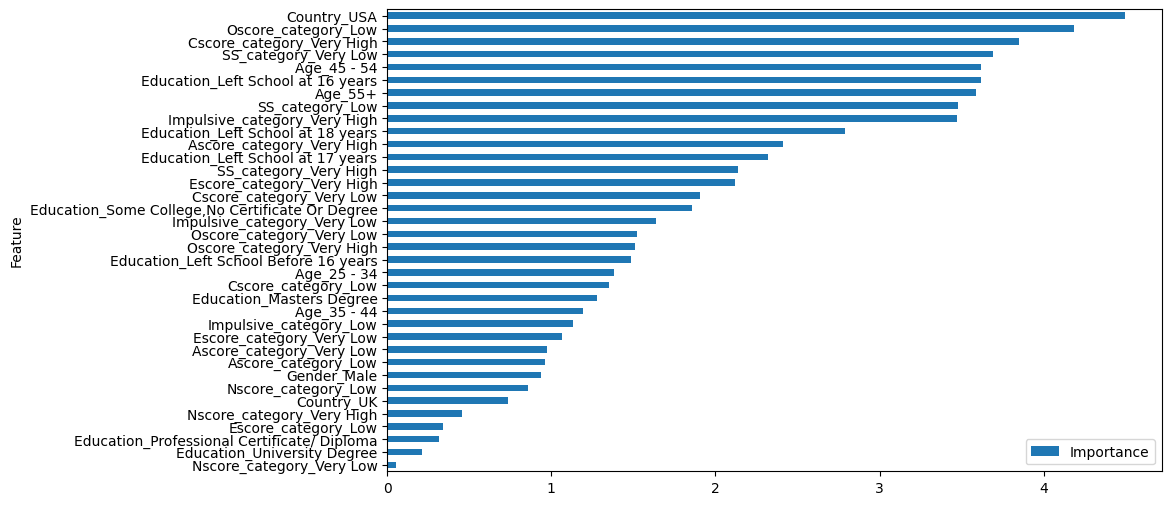

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coefficients = logModel.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': x_train_smote.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<Axes: ylabel='Feature'>

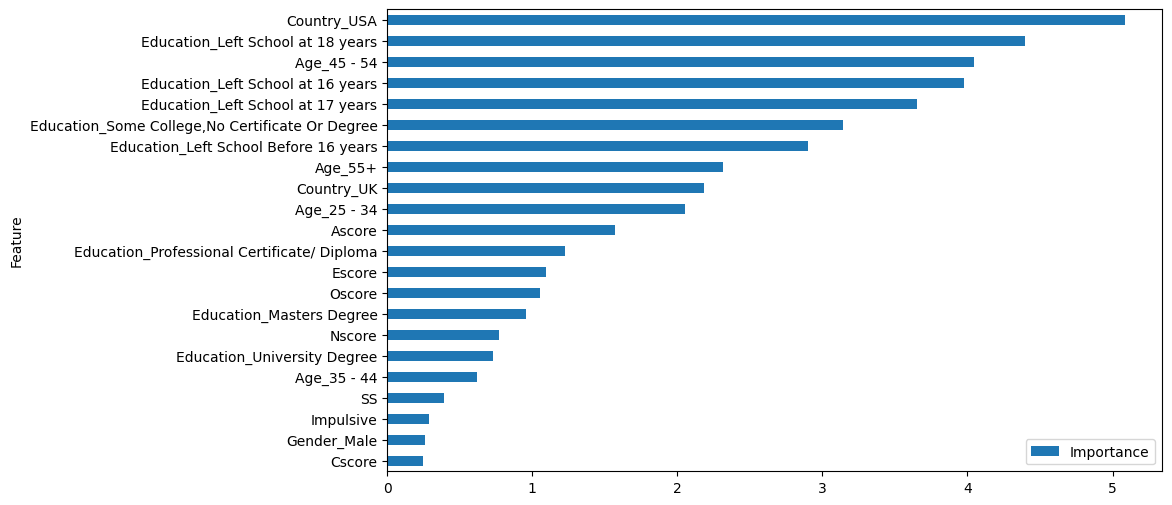

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coefficients = logModel.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': x_train_smote.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

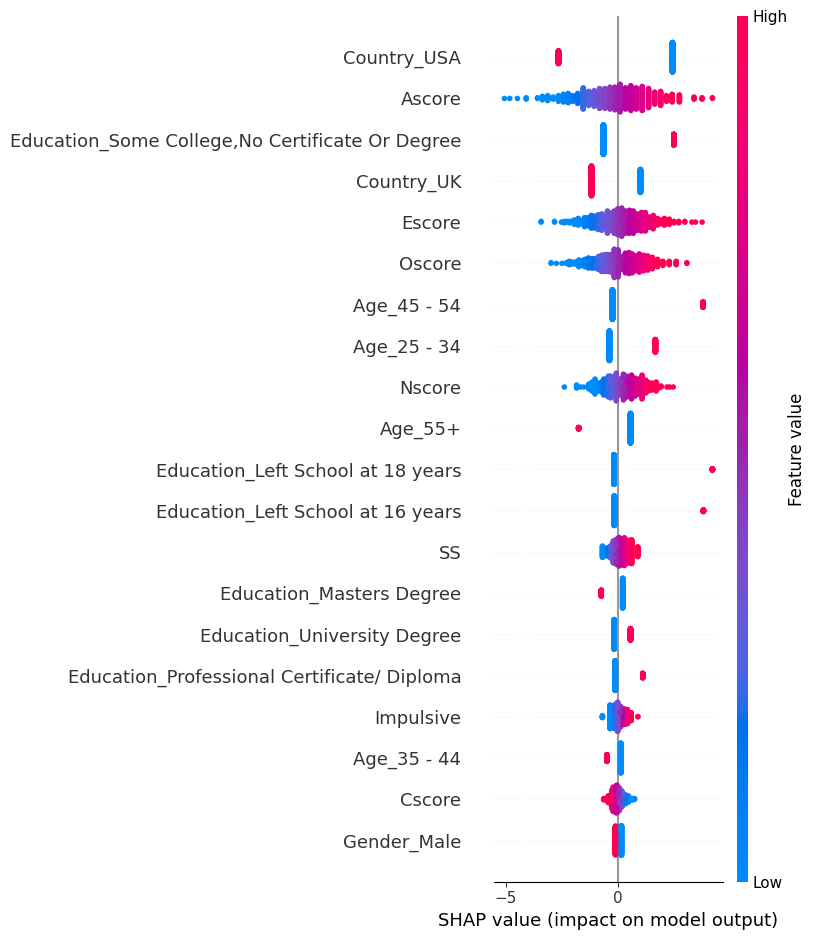

In [ ]:
explainer = shap.LinearExplainer(logModel, x_train_smote)
shap_values = explainer.shap_values(x_test_stim)
shap.summary_plot(shap_values, x_test_stim)

## KNN


by taking scores as categories

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_smote, y_train_smote)
eval(knn)

Accuracy Score(Train set): 0.97
Accuracy Score(Test set): 0.90
Precision Score (Train set):1.00
Precision Score (Test set):1.00
Recall Score (Train set):0.94
Recall Score (Test set):0.91
F1 Score (Train set):0.97
F1 Score (Test set):0.95
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.59
Confusion Matrix:
  [[1306    0]
 [  75 1231]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_smote, y_train_smote)
eval(knn)

Accuracy Score(Train set): 0.97
Accuracy Score(Test set): 0.90
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):0.94
Recall Score (Test set):0.90
F1 Score (Train set):0.97
F1 Score (Test set):0.94
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.56
Confusion Matrix:
  [[1306    0]
 [  78 1228]]


## KNN hyperparameter tuning

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##### by taking scores as categories

In [ ]:
param_grid={'n_neighbors': [10],
            #'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
            #'weights':['uniform','distance'],
            #'p':[2],
            'leaf_size': [10],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
           }
knn_tune=KNeighborsClassifier()
knn_grid = GridSearchCV(knn_tune, param_grid = param_grid, cv = 3,scoring='accuracy')
score=knn_grid.fit(x_train_smote,y_train_smote)

best_knn_grid=score.best_estimator_
eval(best_knn_grid)

Accuracy Score(Train set): 0.93
Accuracy Score(Test set): 0.82
Precision Score (Train set):1.00
Precision Score (Test set):1.00
Recall Score (Train set):0.87
Recall Score (Test set):0.83
F1 Score (Train set):0.93
F1 Score (Test set):0.90
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.55
Confusion Matrix:
  [[1306    0]
 [ 170 1136]]


In [ ]:
score.best_params_

{'algorithm': 'auto',
 'leaf_size': 5,
 'metric': 'manhattan',
 'n_neighbors': 50,
 'weights': 'distance'}

In [ ]:
param_grid={'n_neighbors': [10],
            'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
            #'weights':['uniform'],
            'leaf_size': [15],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
           }

In [ ]:
knn_tune=KNeighborsClassifier()
knn_grid = GridSearchCV(knn_tune, param_grid = param_grid, cv = 3,scoring='roc_auc')
score=knn_grid.fit(x_train_smote,y_train_smote)

best_knn_grid=score.best_estimator_
eval(best_knn_grid)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.86
Precision Score (Train set):1.00
Precision Score (Test set):1.00
Recall Score (Train set):1.00
Recall Score (Test set):0.87
F1 Score (Train set):1.00
F1 Score (Test set):0.93
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.52
Confusion Matrix:
  [[1306    0]
 [   0 1306]]


In [ ]:
score.best_params_

{'algorithm': 'auto',
 'leaf_size': 5,
 'metric': 'manhattan',
 'n_neighbors': 50,
 'weights': 'distance'}

In [ ]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

In [ ]:
y_pred_1=best_knn_grid.predict(x_test_stim)
mcc = matthews_corrcoef(y_test, y_pred_1)
mcc

0.0639870874428613

In [ ]:
cohen_kappa = cohen_kappa_score(y_test, y_pred_1)
cohen_kappa

0.028724943170076456

In [ ]:
score.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 10}

In [ ]:
knn_tune=KNeighborsClassifier()
knn_grid = GridSearchCV(knn_tune, param_grid = param_grid, cv = 3,scoring='roc_auc')
score=knn_grid.fit(x_train_smote,y_train_smote)

best_knn_grid=score.best_estimator_
eval(best_knn_grid)

Accuracy Score(Train set): 0.88
Accuracy Score(Test set): 0.74
Precision Score (Train set):1.00
Precision Score (Test set):1.00
Recall Score (Train set):0.76
Recall Score (Test set):0.75
F1 Score (Train set):0.87
F1 Score (Test set):0.85
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.57
Confusion Matrix:
  [[1306    0]
 [ 310  996]]


In [ ]:
score.best_params_

{'algorithm': 'auto', 'n_neighbors': 50, 'p': 1}

## Random forest

scores categories

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)
eval(rf)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):1.00
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.35
Confusion Matrix:
  [[1306    0]
 [   0 1306]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)
eval(rf)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):1.00
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.43
Confusion Matrix:
  [[1306    0]
 [   0 1306]]


### Random Forest- Hyperparameter tuning¶

scores categories

In [ ]:
rf_param_grid = {'n_estimators': [100,150,300],
                  #'criterion': ['gini', 'entropy'],
                  'max_features': [None,'sqrt','log2'],
                  'max_depth' :[6,8,10],
                 'min_samples_split': [2,3,5,7],
                  'min_samples_leaf' : [10,20,50]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv = 3,scoring='roc_auc')
score=rf_grid.fit(x_train_smote,y_train_smote)
best_rf_grid=score.best_estimator_
eval(best_rf_grid)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):1.00
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.36
Confusion Matrix:
  [[1300    6]
 [   0 1306]]


In [ ]:
rf_param_grid = {'n_estimators': [100,150,300],
                  #'criterion': ['gini', 'entropy'],
                  'max_features': [None,'sqrt'],
                  'max_depth' :[6,8,10],
                 'min_samples_split': [2,3,5,7],
                  'min_samples_leaf' : [10,20,50]}

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv = 3,scoring='roc_auc')
score=rf_grid.fit(x_train_smote,y_train_smote)
best_rf_grid=score.best_estimator_
eval(best_rf_grid)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):1.00
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.35
Confusion Matrix:
  [[1300    6]
 [   0 1306]]


In [ ]:
score.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

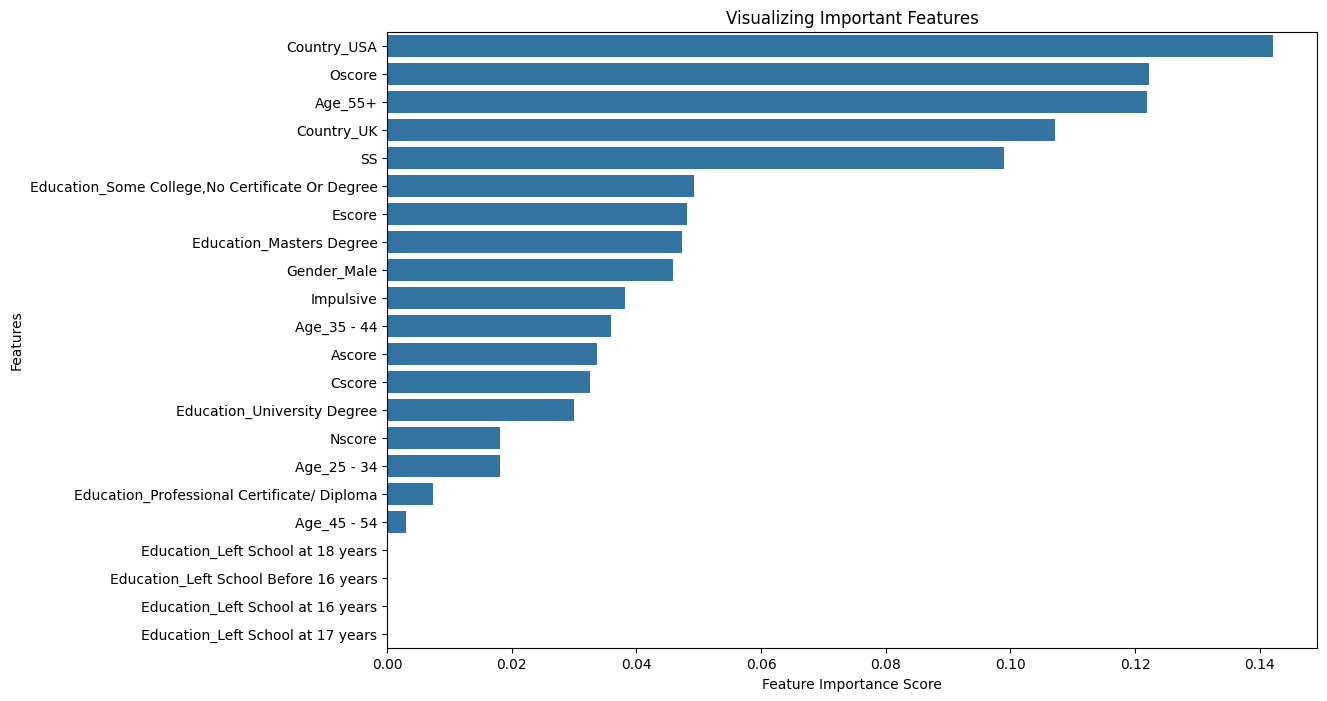

In [ ]:
feature_imp1 = best_rf_grid.feature_importances_
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = [x_train_smote.columns[i] for i in range(len(feature_imp1))]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_imp1
})

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_train_smote, y_train_smote)
eval(svc)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.98
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):0.98
F1 Score (Train set):1.00
F1 Score (Test set):0.99
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.63
Confusion Matrix:
  [[1306    0]
 [   2 1304]]


In [ ]:
svc_param_grid = {'C': [0.1, 1,10,100],
              'gamma': [0.1,0.01,0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
svc= SVC(probability=True)
svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, cv = 3,scoring='roc_auc')
score=svc_grid.fit(x_train_smote,y_train_smote)
best_svc_grid=score.best_estimator_
eval(best_svc_grid)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):0.99
F1 Score (Train set):1.00
F1 Score (Test set):0.99
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.62
Confusion Matrix:
  [[1306    0]
 [   0 1306]]


In [ ]:
score.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

## Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train_smote, y_train_smote)
eval(ab)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):0.99
F1 Score (Train set):1.00
F1 Score (Test set):0.99
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.66
Confusion Matrix:
  [[1302    4]
 [   2 1304]]


### Adaboost tuning without base estimator

In [ ]:
ab_param_grid={
    'algorithm': ['SAMME.R'],
    'learning_rate':[0.001,0.1,1],
    'n_estimators':[50,100,200],
}

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab_grid = GridSearchCV(ab, param_grid = ab_param_grid, cv = 3,scoring='roc_auc')
score=ab_grid.fit(x_train_smote,y_train_smote)
best_ab_grid=score.best_estimator_
eval(best_ab_grid)

Accuracy Score(Train set): 0.99
Accuracy Score(Test set): 0.98
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):0.99
Recall Score (Test set):0.99
F1 Score (Train set):0.99
F1 Score (Test set):0.99
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.67
Confusion Matrix:
  [[1300    6]
 [  13 1293]]


In [ ]:
score.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}

### Adaboost tuning with base estimator

In [ ]:
ab_param_grid={
    'algorithm': ['SAMME.R'],
    'learning_rate':[0.001,0.1,1],
    'n_estimators':[50,100,200]
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_ada = DecisionTreeClassifier(random_state = 42,max_depth=6)
ab = AdaBoostClassifier(random_state=42,estimator=dt_ada)
ab_grid = GridSearchCV(ab, param_grid = ab_param_grid, cv = 3,scoring='roc_auc')
score=ab_grid.fit(x_train_smote,y_train_smote)
best_ab_grid=score.best_estimator_
eval(best_ab_grid)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):0.99
F1 Score (Train set):1.00
F1 Score (Test set):0.99
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.74
Confusion Matrix:
  [[1306    0]
 [   0 1306]]


In [ ]:
score.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_smote, y_train_smote)
eval(gb)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):1.00
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.61
Confusion Matrix:
  [[1305    1]
 [   0 1306]]


### GB with tuning

In [ ]:
gb_param_grid={
    'n_estimators':[50,100,150],
    'max_depth':[4,5,6],
    'max_features':['log2','sqrt',None],
    #'min_samples_leaf': [2],
    'learning_rate':[0.001,0.1,1],
    'subsample':[0.5,0.6]

}

In [ ]:
gb= GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, cv = 3,scoring='roc_auc')
score=gb_grid.fit(x_train_smote,y_train_smote)
best_gb_grid=score.best_estimator_
eval(best_gb_grid)


Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):1.00
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.63
Confusion Matrix:
  [[1306    0]
 [   0 1306]]


In [ ]:
score.best_params_

## XG boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train_smote, y_train_smote)
eval(xgb)

### XG boost with tuning

In [ ]:
xgb_param_grid={
    'max_depth':[4,5,6],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.1,0.5,1],
    'learning_rate':[0.001,0.1,1],
    'subsample':[0.5,0.6]

}

In [ ]:
xgb= XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, cv = 3,scoring='roc_auc')
score=xgb_grid.fit(x_train_smote,y_train_smote)
best_xgb_grid=score.best_estimator_
eval(best_xgb_grid)

In [ ]:
score.best_params_

In [ ]:
explainer = shap.TreeExplainer(best_xgb_grid)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
X = data_to_split.drop(drug_categories, axis=1)
y_depressants = data_to_split['Depressants']

x_train, x_test, y_train, y_test = train_test_split(X, y_depressants, test_size=0.3, random_state=42)

In [ ]:
x_train_depr = pipe.fit_transform(x_train.copy())
x_test_depr = pipe.fit_transform(x_test.copy())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_train.value_counts()

,count
Depressants,
1,1150
0,163


In [ ]:
smt=SMOTE()
x_train_smote,y_train_smote=smt.fit_resample(x_train_depr,y_train)

In [ ]:
y_train_smote.value_counts()

,count
Depressants,
1,1150
0,1150


In [ ]:
def eval_depr(model):
    y_pred=model.predict(x_test_depr)
    y_pred_train=model.predict(x_train_smote)

    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train_smote, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train_smote, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train_smote, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train_smote, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    y_pred_proba = model.predict_proba(x_test_depr)[:,1]
    y_pred_proba_train = model.predict_proba(x_train_smote)[:,1]

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train_smote, y_pred_proba_train))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba))

    print('Confusion Matrix:\n ', confusion_matrix(y_train_smote, y_pred_train))

## logistic

In [ ]:
logModel=LogisticRegression()
logModel.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [ ]:
eval_depr(logModel)

Accuracy Score(Train set): 0.63
Accuracy Score(Test set): 0.56
Precision Score (Train set):0.63
Precision Score (Test set):0.87
Recall Score (Train set):0.61
Recall Score (Test set):0.57
F1 Score (Train set):0.62
F1 Score (Test set):0.69
ROC AUC Score (Train-proba): 0.69
ROC AUC Score (Test-proba): 0.56
Confusion Matrix:
  [[748 402]
 [452 698]]


<Axes: ylabel='Feature'>

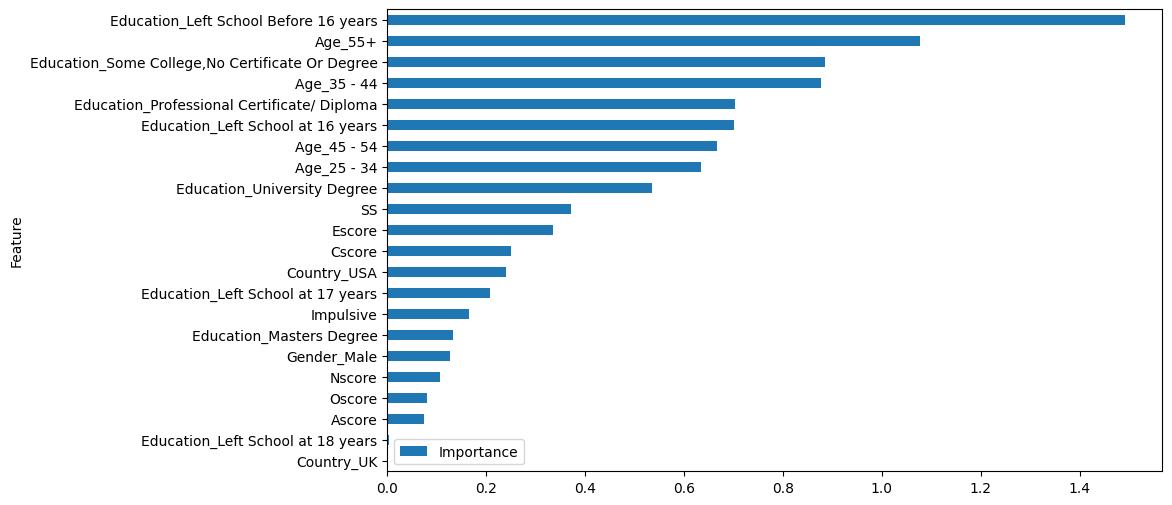

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coefficients = logModel.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': x_train_smote.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_smote, y_train_smote)
eval_depr(knn)

Accuracy Score(Train set): 0.86
Accuracy Score(Test set): 0.59
Precision Score (Train set):1.00
Precision Score (Test set):0.87
Recall Score (Train set):0.73
Recall Score (Test set):0.62
F1 Score (Train set):0.84
F1 Score (Test set):0.72
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.53
Confusion Matrix:
  [[1148    2]
 [ 315  835]]


In [ ]:
param_grid={'n_neighbors': [5,7,9,11],
            'p' : [1,2],
            #'algorithm':['auto','kd_tree', 'brute'],
            'leaf_size': [30, 40,50],
            'metric': ['minkowski', 'chebyshev']
           }
knn_tune=KNeighborsClassifier()
knn_grid = GridSearchCV(knn_tune, param_grid = param_grid, cv = 3,scoring='roc_auc')
score=knn_grid.fit(x_train_smote,y_train_smote)

best_knn_grid=score.best_estimator_
eval_depr(best_knn_grid)

Accuracy Score(Train set): 0.88
Accuracy Score(Test set): 0.66
Precision Score (Train set):0.99
Precision Score (Test set):0.85
Recall Score (Train set):0.77
Recall Score (Test set):0.73
F1 Score (Train set):0.86
F1 Score (Test set):0.79
ROC AUC Score (Train-proba): 0.99
ROC AUC Score (Test-proba): 0.51
Confusion Matrix:
  [[1142    8]
 [ 270  880]]


In [ ]:
param_grid={'n_neighbors': [5,7,9,11],
            'p' : [1,2],
            'algorithm':['auto','kd_tree', 'brute'],
            #'metric': ['minkowski', 'chebyshev']
           }
knn_tune=KNeighborsClassifier()
knn_grid = GridSearchCV(knn_tune, param_grid = param_grid, cv = 3,scoring='roc_auc')
score=knn_grid.fit(x_train_smote,y_train_smote)

best_knn_grid=score.best_estimator_
eval_depr(best_knn_grid)

Accuracy Score(Train set): 0.91
Accuracy Score(Test set): 0.71
Precision Score (Train set):1.00
Precision Score (Test set):0.88
Recall Score (Train set):0.83
Recall Score (Test set):0.76
F1 Score (Train set):0.90
F1 Score (Test set):0.82
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.59
Confusion Matrix:
  [[1147    3]
 [ 201  949]]


In [ ]:
score.best_params_

{'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 7, 'p': 1}

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)
eval_depr(rf)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.85
Precision Score (Train set):1.00
Precision Score (Test set):0.86
Recall Score (Train set):1.00
Recall Score (Test set):0.98
F1 Score (Train set):1.00
F1 Score (Test set):0.92
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.59
Confusion Matrix:
  [[1150    0]
 [   0 1150]]


### Random forest tuning

In [ ]:
rf_param_grid = {'n_estimators': [100,150,300],
                  #'criterion': ['gini', 'entropy'],
                  'max_features': [None,'sqrt'],
                  'max_depth' :[6,8,10],
                 'min_samples_split': [2,3,5,7],
                  'min_samples_leaf' : [10,20,50]}

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv = 3,scoring='roc_auc')
score=rf_grid.fit(x_train_smote,y_train_smote)
best_rf_grid=score.best_estimator_
eval_depr(best_rf_grid)

Accuracy Score(Train set): 0.94
Accuracy Score(Test set): 0.83
Precision Score (Train set):0.91
Precision Score (Test set):0.85
Recall Score (Train set):0.99
Recall Score (Test set):0.97
F1 Score (Train set):0.95
F1 Score (Test set):0.91
ROC AUC Score (Train-proba): 0.99
ROC AUC Score (Test-proba): 0.54
Confusion Matrix:
  [[1036  114]
 [  17 1133]]


In [ ]:
score.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

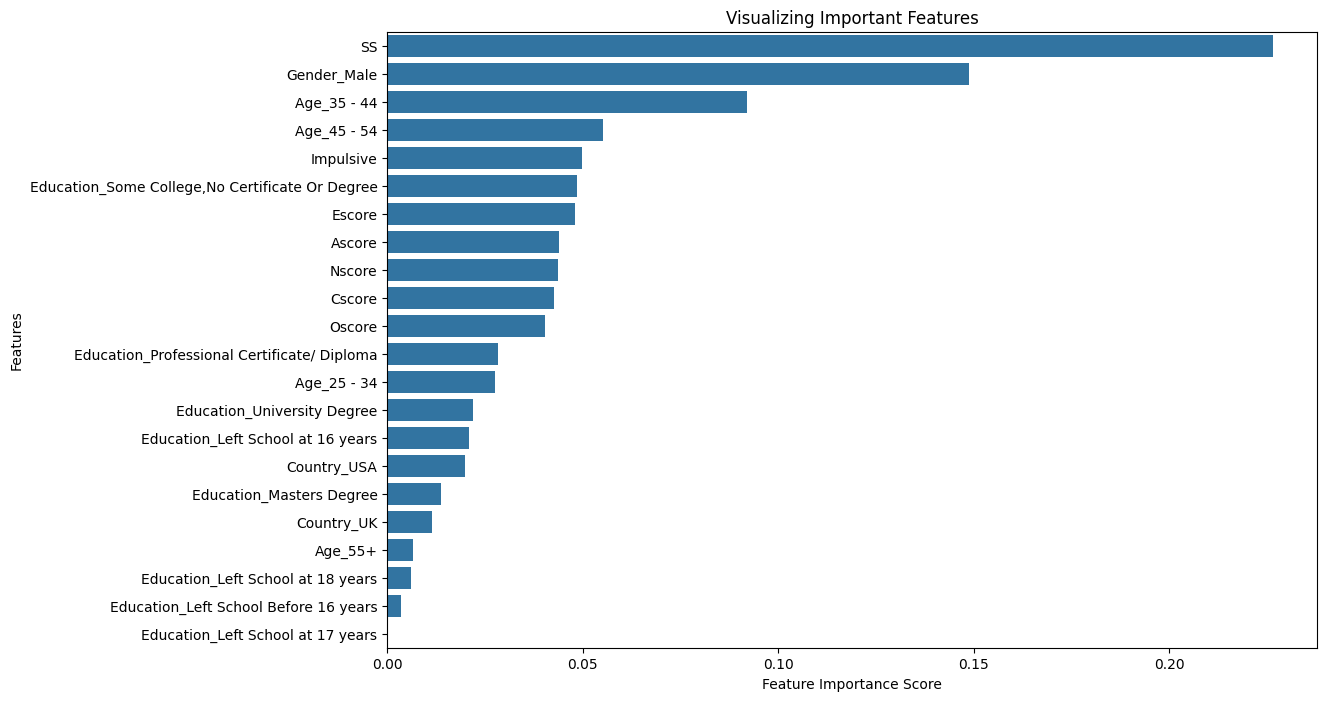

In [ ]:
feature_imp1 = best_rf_grid.feature_importances_
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = [x_train_smote.columns[i] for i in range(len(feature_imp1))]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_imp1
})

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
rf_param_grid = {'n_estimators': [100,200,300],
                 'max_features': ["log2",'sqrt'],
                 'max_depth' :[10,20,30],
                 'min_samples_split': [2,3,5,7],
                  'min_samples_leaf' : [2,3,5]}

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv = 3,scoring='roc_auc')
score=rf_grid.fit(x_train_smote,y_train_smote)
best_rf_grid=score.best_estimator_
eval_depr(best_rf_grid)

Accuracy Score(Train set): 0.99
Accuracy Score(Test set): 0.85
Precision Score (Train set):0.99
Precision Score (Test set):0.86
Recall Score (Train set):1.00
Recall Score (Test set):0.98
F1 Score (Train set):0.99
F1 Score (Test set):0.92
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.58
Confusion Matrix:
  [[1137   13]
 [   1 1149]]


In [ ]:
score.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

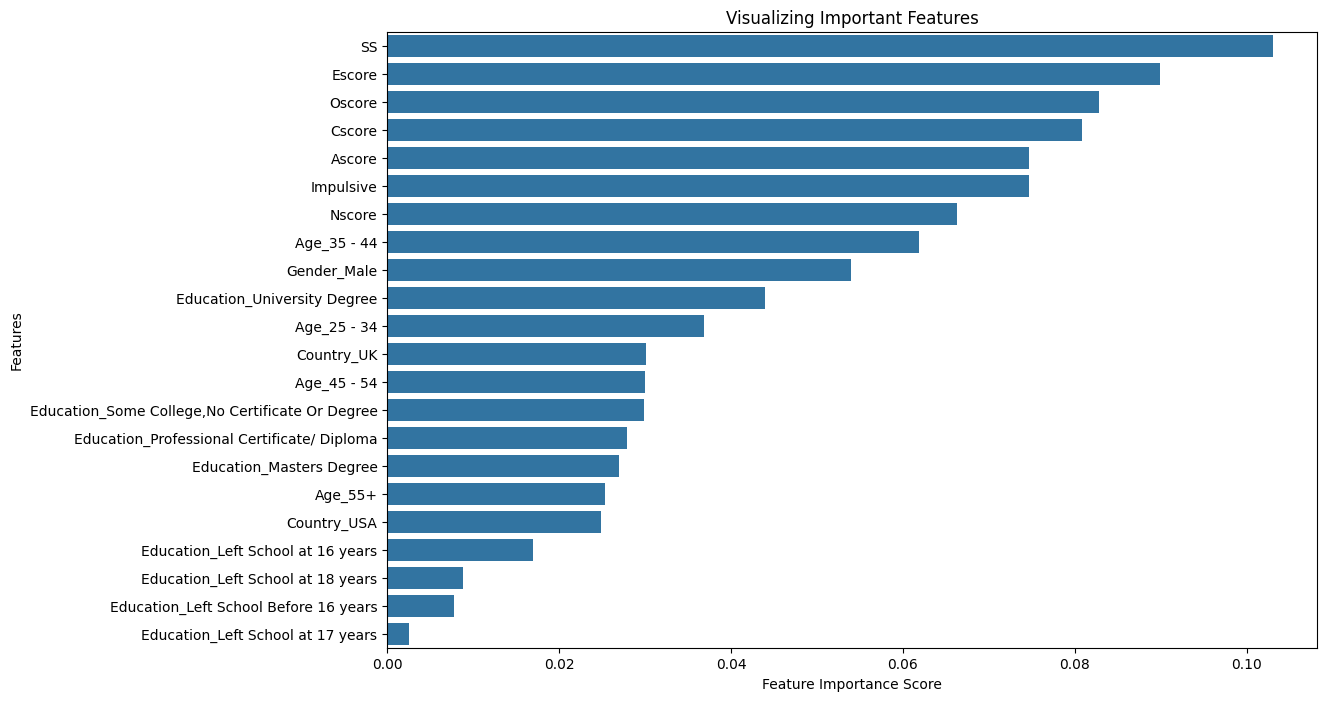

In [ ]:
feature_imp1 = best_rf_grid.feature_importances_
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = [x_train_smote.columns[i] for i in range(len(feature_imp1))]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_imp1
})

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_train_smote, y_train_smote)
eval_depr(svc)

Accuracy Score(Train set): 0.91
Accuracy Score(Test set): 0.74
Precision Score (Train set):0.97
Precision Score (Test set):0.88
Recall Score (Train set):0.85
Recall Score (Test set):0.80
F1 Score (Train set):0.91
F1 Score (Test set):0.84
ROC AUC Score (Train-proba): 0.97
ROC AUC Score (Test-proba): 0.58
Confusion Matrix:
  [[1121   29]
 [ 168  982]]


In [ ]:
svc_param_grid = {'C': [0.001,0.1,1,10],
              'gamma': [0.05],
              'kernel': ['linear', 'poly']}

In [ ]:
svc= SVC(probability=True)
svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, cv = 3,scoring='roc_auc')
score=svc_grid.fit(x_train_smote,y_train_smote)
best_svc_grid=score.best_estimator_
eval_depr(best_svc_grid)

Accuracy Score(Train set): 0.87
Accuracy Score(Test set): 0.65
Precision Score (Train set):0.93
Precision Score (Test set):0.87
Recall Score (Train set):0.80
Recall Score (Test set):0.69
F1 Score (Train set):0.86
F1 Score (Test set):0.77
ROC AUC Score (Train-proba): 0.94
ROC AUC Score (Test-proba): 0.59
Confusion Matrix:
  [[1085   65]
 [ 232  918]]


In [ ]:
# svc_param_grid = {'C': [0.01,0.1,1,10],
#               'gamma': [0.05],
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc= SVC(probability=True)
svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, cv = 3,scoring='roc_auc')
score=svc_grid.fit(x_train_smote,y_train_smote)
best_svc_grid=score.best_estimator_
eval_depr(best_svc_grid)

Accuracy Score(Train set): 0.93
Accuracy Score(Test set): 0.74
Precision Score (Train set):0.97
Precision Score (Test set):0.87
Recall Score (Train set):0.89
Recall Score (Test set):0.81
F1 Score (Train set):0.93
F1 Score (Test set):0.84
ROC AUC Score (Train-proba): 0.98
ROC AUC Score (Test-proba): 0.58
Confusion Matrix:
  [[1119   31]
 [ 130 1020]]


In [ ]:
score.best_params_

{'C': 10, 'gamma': 0.05, 'kernel': 'poly'}

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train_smote, y_train_smote)
eval_depr(ab)

Accuracy Score(Train set): 0.86
Accuracy Score(Test set): 0.76
Precision Score (Train set):0.84
Precision Score (Test set):0.86
Recall Score (Train set):0.90
Recall Score (Test set):0.86
F1 Score (Train set):0.87
F1 Score (Test set):0.86
ROC AUC Score (Train-proba): 0.93
ROC AUC Score (Test-proba): 0.57
Confusion Matrix:
  [[ 948  202]
 [ 112 1038]]


In [ ]:
ab_param_grid={
    'algorithm': ['SAMME.R'],
    'learning_rate':[0.001,0.1,1],
    'n_estimators':[50,100,200],
}

### without base estimator

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab_grid = GridSearchCV(ab, param_grid = ab_param_grid, cv = 3,scoring='roc_auc')
score=ab_grid.fit(x_train_smote,y_train_smote)
best_ab_grid=score.best_estimator_
eval_depr(best_ab_grid)

Accuracy Score(Train set): 0.92
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.88
Precision Score (Test set):0.86
Recall Score (Train set):0.97
Recall Score (Test set):0.93
F1 Score (Train set):0.92
F1 Score (Test set):0.89
ROC AUC Score (Train-proba): 0.97
ROC AUC Score (Test-proba): 0.56
Confusion Matrix:
  [[1001  149]
 [  38 1112]]


### with base estimator

In [ ]:
ab_param_grid={
    'algorithm': ['SAMME.R'],
    'learning_rate':[0.001],
    'n_estimators':[50,100,500]
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_ada = DecisionTreeClassifier(random_state = 42,max_depth=6)
ab = AdaBoostClassifier(random_state=42,estimator=dt_ada)
ab_grid = GridSearchCV(ab, param_grid = ab_param_grid, cv = 3,scoring='roc_auc')
score=ab_grid.fit(x_train_smote,y_train_smote)
best_ab_grid=score.best_estimator_
eval_depr(best_ab_grid)

Accuracy Score(Train set): 0.96
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.93
Precision Score (Test set):0.86
Recall Score (Train set):1.00
Recall Score (Test set):0.93
F1 Score (Train set):0.96
F1 Score (Test set):0.89
ROC AUC Score (Train-proba): 0.99
ROC AUC Score (Test-proba): 0.54
Confusion Matrix:
  [[1064   86]
 [   5 1145]]


In [ ]:
score.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 200}

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_smote, y_train_smote)
eval_depr(gb)

Accuracy Score(Train set): 0.94
Accuracy Score(Test set): 0.84
Precision Score (Train set):0.89
Precision Score (Test set):0.86
Recall Score (Train set):0.99
Recall Score (Test set):0.97
F1 Score (Train set):0.94
F1 Score (Test set):0.91
ROC AUC Score (Train-proba): 0.98
ROC AUC Score (Test-proba): 0.57
Confusion Matrix:
  [[1015  135]
 [   6 1144]]


In [ ]:
gb_param_grid={
    'n_estimators':[300],
    'max_depth':[5],
    #'max_features':['log2','sqrt',None],
    'min_samples_leaf': [5],
    'learning_rate':[0.001],
    'subsample':[0.5]

}

In [ ]:
gb= GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, cv = 3,scoring='roc_auc')
score=gb_grid.fit(x_train_smote,y_train_smote)
best_gb_grid=score.best_estimator_
eval_depr(best_gb_grid)


Accuracy Score(Train set): 0.90
Accuracy Score(Test set): 0.80
Precision Score (Train set):0.87
Precision Score (Test set):0.86
Recall Score (Train set):0.95
Recall Score (Test set):0.91
F1 Score (Train set):0.90
F1 Score (Test set):0.89
ROC AUC Score (Train-proba): 0.96
ROC AUC Score (Test-proba): 0.55
Confusion Matrix:
  [[ 982  168]
 [  63 1087]]


In [ ]:
score.best_params_

{'learning_rate': 0.001,
 'max_depth': 5,
 'min_samples_leaf': 5,
 'n_estimators': 300,
 'subsample': 0.5}

## XG Boosting

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_smote, y_train_smote)
eval_depr(xgb)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.84
Precision Score (Train set):1.00
Precision Score (Test set):0.86
Recall Score (Train set):1.00
Recall Score (Test set):0.96
F1 Score (Train set):1.00
F1 Score (Test set):0.91
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.58
Confusion Matrix:
  [[1150    0]
 [   0 1150]]


In [ ]:
# xgb_param_grid={
#     'max_depth':[4,5],
#     'n_estimators':[100,200,300],
#     'colsample_bytree':[0.7],
#     'learning_rate':[0.001],
#     'subsample':[0.5]

# }
xgb_param_grid={
    'max_depth':[6],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.6],
    'learning_rate':[0.001],
    'subsample':[0.4],
    'min_child_weight':[5],
    'reg_alpha':[0.5]
}

In [ ]:
xgb= XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, cv = 3,scoring='roc_auc')
score=xgb_grid.fit(x_train_smote,y_train_smote)
best_xgb_grid=score.best_estimator_
eval_depr(best_xgb_grid)

Accuracy Score(Train set): 0.91
Accuracy Score(Test set): 0.82
Precision Score (Train set):0.87
Precision Score (Test set):0.86
Recall Score (Train set):0.97
Recall Score (Test set):0.94
F1 Score (Train set):0.92
F1 Score (Test set):0.90
ROC AUC Score (Train-proba): 0.97
ROC AUC Score (Test-proba): 0.56
Confusion Matrix:
  [[ 981  169]
 [  36 1114]]


In [ ]:
score.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.001,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 300,
 'subsample': 0.5}

In [72]:
data_to_split.shape

(1877, 14)

In [73]:
X = data_to_split.drop(drug_categories, axis=1)
y_hallucinogens = data_to_split['Hallucinogens']

x_train, x_test, y_train, y_test = train_test_split(X, y_hallucinogens, test_size=0.3, random_state=42)

In [74]:
x_train_hall = pipe.fit_transform(x_train.copy())
x_test_hall = pipe.transform(x_test.copy())

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [75]:
y_train.value_counts()

Hallucinogens
0    711
1    602
Name: count, dtype: int64

In [76]:
def eval_hall(model):
    y_pred=model.predict(x_test_hall)
    y_pred_train=model.predict(x_train_hall)

    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    y_pred_proba = model.predict_proba(x_test_hall)[:,1]
    y_pred_proba_train = model.predict_proba(x_train_hall)[:,1]

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train, y_pred_proba_train))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba))

    print('Confusion Matrix:\n ', confusion_matrix(y_train, y_pred_train))

## logistic

In [ ]:
logModel=LogisticRegression()
logModel.fit(x_train_hall,y_train)
eval_hall(logModel)

Accuracy Score(Train set): 0.82
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.82
Precision Score (Test set):0.80
Recall Score (Train set):0.79
Recall Score (Test set):0.76
F1 Score (Train set):0.80
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.89
Confusion Matrix:
  [[604 107]
 [128 474]]


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_hall, y_train)
eval_hall(knn)

Accuracy Score(Train set): 0.85
Accuracy Score(Test set): 0.77
Precision Score (Train set):0.84
Precision Score (Test set):0.74
Recall Score (Train set):0.82
Recall Score (Test set):0.74
F1 Score (Train set):0.83
F1 Score (Test set):0.74
ROC AUC Score (Train-proba): 0.93
ROC AUC Score (Test-proba): 0.84
Confusion Matrix:
  [[617  94]
 [108 494]]


In [ ]:
param_grid={'n_neighbors': [20],
            #'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
            #'weights':['uniform','distance'],
            'p':[1,2],
            'leaf_size': [15],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
           }
knn_tune=KNeighborsClassifier()
knn_grid = GridSearchCV(knn_tune, param_grid = param_grid, cv = 3,scoring='accuracy')
score=knn_grid.fit(x_train_hall,y_train)

best_knn_grid=score.best_estimator_
eval_hall(best_knn_grid)

Accuracy Score(Train set): 0.82
Accuracy Score(Test set): 0.79
Precision Score (Train set):0.81
Precision Score (Test set):0.77
Recall Score (Train set):0.79
Recall Score (Test set):0.74
F1 Score (Train set):0.80
F1 Score (Test set):0.75
ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.87
Confusion Matrix:
  [[602 109]
 [125 477]]


In [ ]:
score.best_params_

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 20, 'p': 1}

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_hall, y_train)
eval_hall(rf)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.80
Precision Score (Train set):1.00
Precision Score (Test set):0.77
Recall Score (Train set):1.00
Recall Score (Test set):0.77
F1 Score (Train set):1.00
F1 Score (Test set):0.77
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.87
Confusion Matrix:
  [[710   1]
 [  1 601]]


In [ ]:
rf_param_grid = {'n_estimators': [100,150,300],
                  #'criterion': ['gini', 'entropy'],
                  'max_features': [None,'sqrt','log2'],
                  'max_depth' :[6,8,10],
                 'min_samples_split': [2,3,5,7],
                  'min_samples_leaf' : [10,20,50]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv = 3,scoring='roc_auc')
score=rf_grid.fit(x_train_hall,y_train)
best_rf_grid=score.best_estimator_
eval_hall(best_rf_grid)

Accuracy Score(Train set): 0.82
Accuracy Score(Test set): 0.80
Precision Score (Train set):0.80
Precision Score (Test set):0.77
Recall Score (Train set):0.81
Recall Score (Test set):0.78
F1 Score (Train set):0.81
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.91
ROC AUC Score (Test-proba): 0.88
Confusion Matrix:
  [[591 120]
 [112 490]]


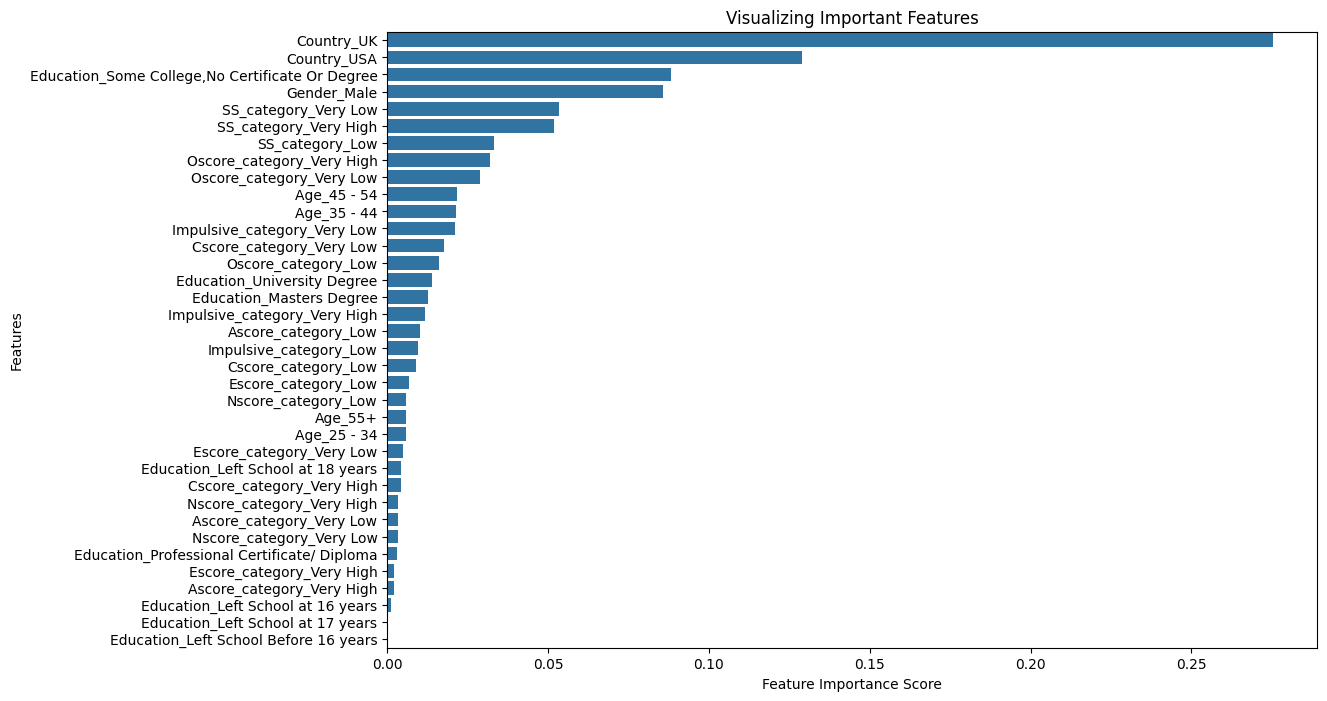

In [ ]:
feature_imp1 = best_rf_grid.feature_importances_
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = [x_train_hall.columns[i] for i in range(len(feature_imp1))]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_imp1
})

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_train_hall, y_train)
eval_hall(svc)

Accuracy Score(Train set): 0.88
Accuracy Score(Test set): 0.80
Precision Score (Train set):0.86
Precision Score (Test set):0.77
Recall Score (Train set):0.88
Recall Score (Test set):0.79
F1 Score (Train set):0.87
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.96
ROC AUC Score (Test-proba): 0.88
Confusion Matrix:
  [[628  83]
 [ 71 531]]


In [ ]:
svc_param_grid = {'C': [0.1, 1,10,100],
              'gamma': [0.1,0.01,0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc= SVC(probability=True)
svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, cv = 3,scoring='roc_auc')
score=svc_grid.fit(x_train_hall,y_train)
best_svc_grid=score.best_estimator_
eval_hall(best_svc_grid)

Accuracy Score(Train set): 0.86
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.84
Precision Score (Test set):0.78
Recall Score (Train set):0.86
Recall Score (Test set):0.79
F1 Score (Train set):0.85
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.93
ROC AUC Score (Test-proba): 0.89
Confusion Matrix:
  [[614  97]
 [ 87 515]]


## AdaBoostin

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train_hall, y_train)
eval_hall(ab)

Accuracy Score(Train set): 0.81
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.81
Precision Score (Test set):0.80
Recall Score (Train set):0.77
Recall Score (Test set):0.76
F1 Score (Train set):0.79
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.89
Confusion Matrix:
  [[600 111]
 [137 465]]


In [ ]:
ab_param_grid={
    'algorithm': ['SAMME.R'],
    'learning_rate':[0.01],
    'n_estimators':[150]
}
from sklearn.tree import DecisionTreeClassifier
dt_ada = DecisionTreeClassifier(random_state = 42,max_depth=6)
ab = AdaBoostClassifier(random_state=42,estimator=dt_ada)
ab_grid = GridSearchCV(ab, param_grid = ab_param_grid, cv = 3,scoring='roc_auc')
score=ab_grid.fit(x_train_hall,y_train)
best_ab_grid=score.best_estimator_
eval_hall(best_ab_grid)

Accuracy Score(Train set): 0.94
Accuracy Score(Test set): 0.79
Precision Score (Train set):0.94
Precision Score (Test set):0.76
Recall Score (Train set):0.94
Recall Score (Test set):0.75
F1 Score (Train set):0.94
F1 Score (Test set):0.75
ROC AUC Score (Train-proba): 0.99
ROC AUC Score (Test-proba): 0.81
Confusion Matrix:
  [[673  38]
 [ 39 563]]


In [ ]:
score.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab_grid = GridSearchCV(ab, param_grid = ab_param_grid, cv = 3,scoring='roc_auc')
score=ab_grid.fit(x_train_hall,y_train)
best_ab_grid=score.best_estimator_
eval_hall(best_ab_grid)

Accuracy Score(Train set): 0.77
Accuracy Score(Test set): 0.77
Precision Score (Train set):0.75
Precision Score (Test set):0.74
Recall Score (Train set):0.73
Recall Score (Test set):0.74
F1 Score (Train set):0.74
F1 Score (Test set):0.74
ROC AUC Score (Train-proba): 0.84
ROC AUC Score (Test-proba): 0.84
Confusion Matrix:
  [[566 145]
 [161 441]]


## Gradient boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_hall, y_train)
eval_hall(gb)

Accuracy Score(Train set): 0.87
Accuracy Score(Test set): 0.79
Precision Score (Train set):0.86
Precision Score (Test set):0.75
Recall Score (Train set):0.85
Recall Score (Test set):0.77
F1 Score (Train set):0.86
F1 Score (Test set):0.76
ROC AUC Score (Train-proba): 0.94
ROC AUC Score (Test-proba): 0.88
Confusion Matrix:
  [[626  85]
 [ 88 514]]


In [92]:
gb_param_grid={
    'n_estimators':[300,200,100],
    'max_depth':[6,8,10],
    #'max_features':['log2','sqrt',None],
    'min_samples_leaf': [7,3,5,9],
    'learning_rate':[0.001,0.01],
    'subsample':[0.6,0.5,0.8]

}

In [93]:
gb= GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, cv = 3,scoring='roc_auc')
score=gb_grid.fit(x_train_hall,y_train)
best_gb_grid=score.best_estimator_
eval_hall(best_gb_grid)


Accuracy Score(Train set): 0.87
Accuracy Score(Test set): 0.80
Precision Score (Train set):0.86
Precision Score (Test set):0.78
Recall Score (Train set):0.86
Recall Score (Test set):0.78
F1 Score (Train set):0.86
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.94
ROC AUC Score (Test-proba): 0.89
Confusion Matrix:
  [[624  87]
 [ 86 516]]


In [96]:
score.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_samples_leaf': 9,
 'n_estimators': 300,
 'subsample': 0.5}

In [121]:
# gb_param_grid={
#     'n_estimators':[300],
#     'max_depth':[8],
#     #'max_features':['log2','sqrt',None],
#     'min_samples_leaf': [5],
#     'learning_rate':[0.001],
#     'subsample':[0.5]

# }

In [122]:
# gb= GradientBoostingClassifier(random_state=42)
# gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, cv = 3,scoring='roc_auc')
# score=gb_grid.fit(x_train_hall,y_train)
# best_gb_grid=score.best_estimator_
# eval_hall(best_gb_grid)


Accuracy Score(Train set): 0.85
Accuracy Score(Test set): 0.80
Precision Score (Train set):0.89
Precision Score (Test set):0.80
Recall Score (Train set):0.77
Recall Score (Test set):0.71
F1 Score (Train set):0.83
F1 Score (Test set):0.75
ROC AUC Score (Train-proba): 0.94
ROC AUC Score (Test-proba): 0.88
Confusion Matrix:
  [[656  55]
 [140 462]]


## XG boosting

In [123]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_hall, y_train)
eval_hall(xgb)

Accuracy Score(Train set): 0.99
Accuracy Score(Test set): 0.78
Precision Score (Train set):0.99
Precision Score (Test set):0.75
Recall Score (Train set):0.99
Recall Score (Test set):0.77
F1 Score (Train set):0.99
F1 Score (Test set):0.76
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.86
Confusion Matrix:
  [[704   7]
 [  5 597]]


In [158]:
# xgb_param_grid={
#     'max_depth':[8],
#     'n_estimators':[100,200,300],
#     'colsample_bytree':[0.4],
#     'learning_rate':[0.01],
#     'subsample':[0.5],
#     'min_child_weight':[5]
# }
xgb_param_grid={
    'max_depth':[6],
    'n_estimators':[300],
    'colsample_bytree':[0.4],
    'learning_rate':[0.01],
    'subsample':[0.4],
    'min_child_weight':[3]
}

In [139]:
xgb= XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, cv = 3,scoring='roc_auc')
score=xgb_grid.fit(x_train_hall,y_train)
best_xgb_grid=score.best_estimator_
eval_hall(best_xgb_grid)

Accuracy Score(Train set): 0.82
Accuracy Score(Test set): 0.80
Precision Score (Train set):0.80
Precision Score (Test set):0.77
Recall Score (Train set):0.81
Recall Score (Test set):0.76
F1 Score (Train set):0.81
F1 Score (Test set):0.77
ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.88
Confusion Matrix:
  [[592 119]
 [113 489]]


In [159]:
xgb= XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, cv = 3,scoring='roc_auc')
score=xgb_grid.fit(x_train_hall,y_train)
best_xgb_grid=score.best_estimator_
eval_hall(best_xgb_grid)

Accuracy Score(Train set): 0.83
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.81
Precision Score (Test set):0.78
Recall Score (Train set):0.81
Recall Score (Test set):0.77
F1 Score (Train set):0.81
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.91
ROC AUC Score (Test-proba): 0.88
Confusion Matrix:
  [[599 112]
 [112 490]]


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [ ]:
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')  # You can set k to a specific number
mi_selector.fit(x_train_smote, y_train_smote)

# Get the scores and features
mi_scores = mi_selector.scores_
mi_features = x_train_smote.columns[mi_selector.get_support()]

# Create a DataFrame for better visualization
mi_results = pd.DataFrame({'Feature': x_train_smote.columns, 'Mutual Information Score': mi_scores})
print(mi_results.sort_values(by='Mutual Information Score', ascending=False))

                                            Feature  Mutual Information Score
3                                            Ascore                  0.626551
1                                            Escore                  0.625926
4                                            Cscore                  0.624147
2                                            Oscore                  0.594553
0                                            Nscore                  0.587222
5                                         Impulsive                  0.548858
6                                                SS                  0.522696
9                                       Country_USA                  0.302914
8                                        Country_UK                  0.269921
7                                       Gender_Male                  0.258775
18                         Education_Masters Degree                  0.237363
11                                      Age_35 - 44             

##### for score categories

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier

rfe=RFECV(estimator=ExtraTreesClassifier(),min_features_to_select=1,cv=5)
model=rfe.fit(x_train_smote,y_train_smote)
x_train_smote.columns[(model.get_support())].shape

In [ ]:
x_train_smote.columns.shape

(36,)

In [ ]:
x_train_smote.columns[(model.get_support())]

Index(['Gender_Male', 'Country_UK', 'Country_USA', 'Age_35 - 44', 'Age_55+',
       'Education_Masters Degree', 'Education_University Degree',
       'Nscore_category_Low', 'Escore_category_Low', 'Oscore_category_Low',
       'Ascore_category_Low', 'Ascore_category_Very Low',
       'Impulsive_category_Low', 'Impulsive_category_Very Low',
       'SS_category_Low'],
      dtype='object')

In [ ]:
selCols=['Gender_Male', 'Country_UK', 'Country_USA', 'Age_35 - 44', 'Age_55+',
       'Education_Masters Degree', 'Education_University Degree',
       'Nscore_category_Low', 'Escore_category_Low', 'Oscore_category_Low',
       'Ascore_category_Low', 'Ascore_category_Very Low',
       'Impulsive_category_Low', 'Impulsive_category_Very Low',
       'SS_category_Low']

In [ ]:
def eval1(model):
    y_pred=model.predict(x_test_new)
    y_pred_train=model.predict(x_train_smote_new)

    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train_smote, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train_smote, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train_smote, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train_smote, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    y_pred_proba = model.predict_proba(x_test_new)[:,1]
    y_pred_proba_train = model.predict_proba(x_train_smote_new)[:,1]

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train_smote, y_pred_proba_train))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba))

    print('Confusion Matrix:\n ', confusion_matrix(y_train_smote, y_pred_train))

In [ ]:
x_train_smote_new=x_train_smote[selCols].copy()
x_test_new=x_test_stim[selCols].copy()

In [ ]:
from xgboost import XGBClassifier
xgb_param_grid={
    'max_depth':[8],
    'n_estimators':[50,150,200],
    'colsample_bytree':[0.5],
    'learning_rate':[0.01],
    'subsample':[0.7],
    'min_child_weight':[2],
    #'reg_alpha':[0.5]
}
xgb= XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, cv = 3,scoring='roc_auc')
score=xgb_grid.fit(x_train_smote_new,y_train_smote)
best_xgb_grid=score.best_estimator_
eval1(best_xgb_grid)

Accuracy Score(Train set): 0.99
Accuracy Score(Test set): 0.99
Precision Score (Train set):0.99
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):0.99
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.14
Confusion Matrix:
  [[1291   15]
 [   0 1306]]


In [ ]:
score.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.0001,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 300,
 'reg_alpha': 0.5,
 'subsample': 0.3}

##### without score categories

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier

rfe=RFECV(estimator=ExtraTreesClassifier(),min_features_to_select=1,cv=5)
model=rfe.fit(x_train_smote,y_train_smote)

In [ ]:
x_train_smote.columns[(model.get_support())].shape

(14,)

In [ ]:
x_train_smote.columns.shape

(22,)

In [ ]:
x_train_smote.columns[(model.get_support())]

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Gender_Male', 'Country_UK', 'Age_25 - 34', 'Age_35 - 44',
       'Age_45 - 54', 'Education_Some College,No Certificate Or Degree',
       'Education_University Degree'],
      dtype='object')

In [ ]:
x_train_smote.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Gender_Male', 'Country_UK', 'Country_USA', 'Age_25 - 34',
       'Age_35 - 44', 'Age_45 - 54', 'Age_55+',
       'Education_Left School Before 16 years',
       'Education_Left School at 16 years',
       'Education_Left School at 17 years',
       'Education_Left School at 18 years', 'Education_Masters Degree',
       'Education_Professional Certificate/ Diploma',
       'Education_Some College,No Certificate Or Degree',
       'Education_University Degree'],
      dtype='object')

In [ ]:
selCols=['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Gender_Male', 'Country_UK', 'Age_25 - 34', 'Age_35 - 44',
       'Age_45 - 54', 'Education_Some College,No Certificate Or Degree',
       'Education_University Degree']

In [ ]:
def eval1(model):
    y_pred=model.predict(x_test_new)
    y_pred_train=model.predict(x_train_smote_new)

    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train_smote, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train_smote, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train_smote, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train_smote, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    y_pred_proba = model.predict_proba(x_test_new)[:,1]
    y_pred_proba_train = model.predict_proba(x_train_smote_new)[:,1]

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train_smote, y_pred_proba_train))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba))

    print('Confusion Matrix:\n ', confusion_matrix(y_train_smote, y_pred_train))

In [ ]:
x_train_smote_new=x_train_smote[selCols].copy()
x_test_new=x_test_stim[selCols].copy()

In [ ]:
xgb_param_grid={
    'max_depth':[6],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.6],
    'learning_rate':[0.001],
    'subsample':[0.4],
    'min_child_weight':[5],
    'reg_alpha':[1]
}

In [ ]:
xgb= XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, cv = 3,scoring='roc_auc')
score=xgb_grid.fit(x_train_smote_new,y_train_smote)
best_xgb_grid=score.best_estimator_
eval1(best_xgb_grid)

Accuracy Score(Train set): 0.90
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.86
Precision Score (Test set):0.86
Recall Score (Train set):0.95
Recall Score (Test set):0.93
F1 Score (Train set):0.90
F1 Score (Test set):0.89
ROC AUC Score (Train-proba): 0.97
ROC AUC Score (Test-proba): 0.55
Confusion Matrix:
  [[ 977  173]
 [  58 1092]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_smote_new, y_train_smote)
eval1(rf)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.99
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):1.00
Recall Score (Test set):1.00
F1 Score (Train set):1.00
F1 Score (Test set):1.00
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.51
Confusion Matrix:
  [[1306    0]
 [   0 1306]]


In [ ]:
param_grid={'n_neighbors': [5,10,50,100],
            'p' : [1,2],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
           }

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_tune=KNeighborsClassifier()
knn_grid = GridSearchCV(knn_tune, param_grid = param_grid, cv = 3,scoring='roc_auc')
score=knn_grid.fit(x_train_smote_new,y_train_smote)

best_knn_grid=score.best_estimator_
eval1(best_knn_grid)

Accuracy Score(Train set): 0.95
Accuracy Score(Test set): 0.88
Precision Score (Train set):1.00
Precision Score (Test set):0.99
Recall Score (Train set):0.90
Recall Score (Test set):0.89
F1 Score (Train set):0.94
F1 Score (Test set):0.94
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.63
Confusion Matrix:
  [[1306    0]
 [ 137 1169]]


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier

rfe=RFECV(estimator=ExtraTreesClassifier(),min_features_to_select=1,cv=5)
model=rfe.fit(x_train_hall,y_train)


In [ ]:
x_train_hall.columns[(model.get_support())].shape

(32,)

In [ ]:
x_train_hall.columns.shape

(36,)

In [ ]:
x_train_hall.columns[(model.get_support())]

Index(['Gender_Male', 'Country_UK', 'Country_USA', 'Age_25 - 34',
       'Age_35 - 44', 'Age_45 - 54', 'Age_55+', 'Education_Masters Degree',
       'Education_Professional Certificate/ Diploma',
       'Education_Some College,No Certificate Or Degree',
       'Education_University Degree', 'Nscore_category_Low',
       'Nscore_category_Very High', 'Nscore_category_Very Low',
       'Escore_category_Low', 'Escore_category_Very High',
       'Escore_category_Very Low', 'Oscore_category_Low',
       'Oscore_category_Very High', 'Oscore_category_Very Low',
       'Ascore_category_Low', 'Ascore_category_Very High',
       'Ascore_category_Very Low', 'Cscore_category_Low',
       'Cscore_category_Very High', 'Cscore_category_Very Low',
       'Impulsive_category_Low', 'Impulsive_category_Very High',
       'Impulsive_category_Very Low', 'SS_category_Low',
       'SS_category_Very High', 'SS_category_Very Low'],
      dtype='object')

In [ ]:
selCols=['Gender_Male', 'Country_UK', 'Country_USA', 'Age_25 - 34',
       'Age_35 - 44', 'Age_45 - 54', 'Age_55+', 'Education_Masters Degree',
       'Education_Professional Certificate/ Diploma',
       'Education_Some College,No Certificate Or Degree',
       'Education_University Degree', 'Nscore_category_Low',
       'Nscore_category_Very High', 'Nscore_category_Very Low',
       'Escore_category_Low', 'Escore_category_Very High',
       'Escore_category_Very Low', 'Oscore_category_Low',
       'Oscore_category_Very High', 'Oscore_category_Very Low',
       'Ascore_category_Low', 'Ascore_category_Very High',
       'Ascore_category_Very Low', 'Cscore_category_Low',
       'Cscore_category_Very High', 'Cscore_category_Very Low',
       'Impulsive_category_Low', 'Impulsive_category_Very High',
       'Impulsive_category_Very Low', 'SS_category_Low',
       'SS_category_Very High', 'SS_category_Very Low']

In [ ]:
def eval2(model):
    y_pred=model.predict(x_test_new)
    y_pred_train=model.predict(x_train_hall_new)

    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    y_pred_proba = model.predict_proba(x_test_new)[:,1]
    y_pred_proba_train = model.predict_proba(x_train_hall_new)[:,1]

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train, y_pred_proba_train))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba))

    print('Confusion Matrix:\n ', confusion_matrix(y_train, y_pred_train))

In [ ]:
x_train_hall_new=x_train_hall[selCols].copy()
x_test_new=x_test_hall[selCols].copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_hall_new, y_train)
eval2(rf)

Accuracy Score(Train set): 1.00
Accuracy Score(Test set): 0.80
Precision Score (Train set):1.00
Precision Score (Test set):0.77
Recall Score (Train set):1.00
Recall Score (Test set):0.77
F1 Score (Train set):1.00
F1 Score (Test set):0.77
ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.86
Confusion Matrix:
  [[709   2]
 [  0 602]]


In [ ]:
rf_param_grid = {'n_estimators': [100,150,300],
                  #'criterion': ['gini', 'entropy'],
                  'max_features': [None,'sqrt','log2'],
                  'max_depth' :[8],
                 'min_samples_split': [5],
                  'min_samples_leaf' : [15]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv = 3,scoring='roc_auc')
score=rf_grid.fit(x_train_hall_new,y_train)
best_rf_grid=score.best_estimator_
eval2(best_rf_grid)

Accuracy Score(Train set): 0.82
Accuracy Score(Test set): 0.81
Precision Score (Train set):0.80
Precision Score (Test set):0.78
Recall Score (Train set):0.81
Recall Score (Test set):0.79
F1 Score (Train set):0.80
F1 Score (Test set):0.78
ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.87
Confusion Matrix:
  [[588 123]
 [117 485]]


In [ ]:
score.best_params_


{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 300}